In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### هنا سوف اعرف الباثات الاساسية للملفات التي سوف استعملها 

In [ ]:
from dataclasses import dataclass

@dataclass
class Config:
    # Data
    raw_data_dir = "./Data/SSAC-UNPC"
    ABD_data_dir = "./Data/ABC"

    cleaned_data_dir = "./Clean/full-corpus2"
    ABC_cleaned_data_dir = "./Clean/ABC"

    # Logs
    per_file_stats_json_dir = "./Logs/full-corpus/per_file_stats.json"
    ABC_per_file_stats_json_dir = "./Logs/ABC/per_file_stats.json"
    corpus_summary_json_dir = "./Logs/full-corpus/corpus_summary.json"
    run_log_dir = "./Logs/run.log"


### هذا التابع يقوم بعمل فحص كامل للمجلد إعادة الملفات النصية

In [3]:
import os
def load_data(folder_path):
    with os.scandir(folder_path) as entries:
        for entry in entries:
            if entry.is_file() and entry.name.endswith('.txt'):
                try:
                    with open(entry.path, 'r', encoding='utf-8', errors='replace') as file:
                        content = file.read()
                        yield {
                            'path': entry.path,
                            'filename': entry.name,
                            'content': content,
                            'size': os.path.getsize(entry.path)
                        }
                except Exception as e:
                    print(f"Error reading {entry.name}: {e}")
            elif entry.is_dir():
                yield from load_data(entry.path)

In [ ]:
path = Config.raw_data_dir
data = list(load_data(path))

for content in data:
    print(f"Filename: {content['filename']}")
    print(f"Size: {content['size']} bytes")


### تحليل بسيط لعدد المحارف  

In [ ]:
def count_chart(data, title='Character Occurrences'):
    from collections import Counter
    all_text = ''.join([item['content'] for item in data])
    char_counts = Counter(all_text)
    print("Chart Count is\n" , char_counts)
    chars = list(char_counts.keys())
    counts = list(char_counts.values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=chars, y=counts)
    plt.title(title)
    plt.xlabel('Characters')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=90)
    plt.show()


Chart Count is
 Counter({' ': 201782, 'ا': 119967, 'ل': 98206, 'ي': 61693, 'م': 51613, 'و': 49570, 'ن': 48315, 'ر': 36035, 'ه': 32052, 'ت': 31442, 'ب': 31135, 'ع': 29169, 'ف': 24362, 'د': 21952, 'أ': 21074, 'ة': 20306, 'ق': 18561, 'ك': 18232, 'س': 18160, 'َ': 17743, '.': 14984, 'ح': 14958, 'ج': 11823, '،': 10859, 'إ': 8378, 'ى': 8151, 'ذ': 8148, 'ص': 7743, '\n': 7459, 'ط': 7283, 'خ': 7031, 'ش': 7020, 'ِ': 6610, 'ُ': 6213, 'ث': 5652, 'ض': 5503, 'ّ': 5379, 'ْ': 5191, 'ً': 4736, 'ز': 4393, 'غ': 3753, 'ء': 3515, '\t': 3296, 'ئ': 3130, ':': 2510, 'ظ': 2268, '"': 1335, 'آ': 1167, '«': 1145, '»': 1123, '—': 964, 'ٍ': 835, 'ؤ': 830, ')': 712, '(': 672, '؟': 528, 'ٌ': 520, '١': 507, '!': 423, '؛': 395, '-': 383, '2': 365, '٢': 335, '1': 262, '٣': 234, 'e': 221, '٤': 216, '٨': 211, '•': 207, '٥': 199, '٩': 199, 'a': 184, '٠': 173, '٦': 172, '٧': 159, 'o': 156, 'i': 153, '0': 153, '\xa0': 152, 'n': 143, 'r': 139, 's': 136, 't': 122, '…': 116, '3': 108, '8': 96, '5': 95, '–': 88, 'l': 87, '9': 87,

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65018 (\N{ARABIC LIGATURE SALLALLAHOU ALAYHE WASALLAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1754 (\N{ARABIC SMALL HIGH JEEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtoo

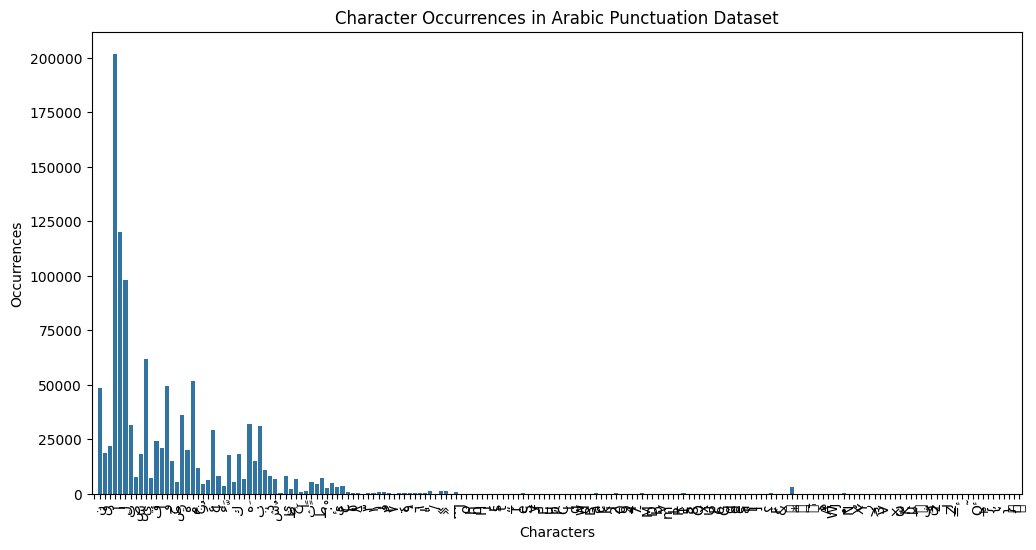

In [ ]:
count_chart(data, title='Character Occurrences in Arabic Punctuation Dataset')

### هنا نجد ان هناك كمية محارف ضخمة يجب ان تزال

سأقوم بتجميع توابع تحليل الداتا على مستوى الاحرف في الكلاس التالي

Least Common Characters: [('à', 1), ('\u200e', 1), ('\u200f', 1), ('&', 1), ('ۚ', 1), ('X', 1), ('٫', 1), ('>', 1), ('ω', 1), ('μ', 1), ("'", 1), ('j', 1), ('Z', 1), ('ٓ', 1), ('°', 1), ('U', 2), ('è', 2), ('Y', 2), ('ڨ', 2), ('Q', 2), ('+', 2), ('ﱢ', 2), ('x', 3), ('ٰ', 3), ('z', 3), ('I', 4), ('ﻟ', 4), ('\u2009', 4), ('F', 5), ('ۖ', 5), ('’', 5), ('‘', 5), ('ﱠ', 5), ('”', 6), ('−', 6), ('v', 7), ('O', 7), ('é', 7), ('“', 8), ('E', 8)]


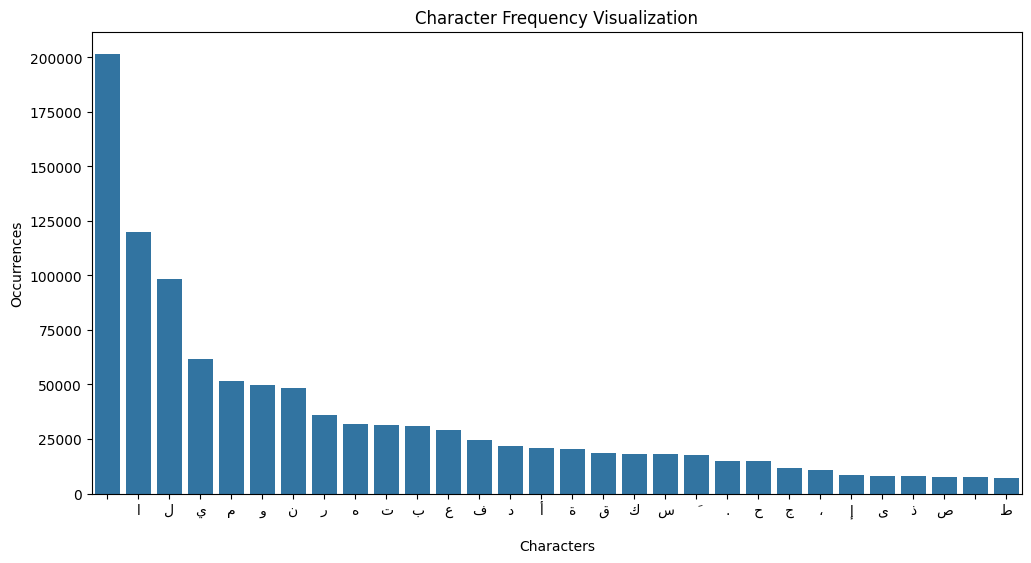

In [ ]:
from collections import Counter, defaultdict
import string

class CharacterAnalyzer:
    def __init__(self, text: str):
        self.text = text
        self.char_counts = self._count_all_chars()

    def _count_all_chars(self) -> dict:
        
        return dict(Counter(self.text))

    def get_sorted_counts(self, descending: bool = True) -> list:
        return sorted(
            self.char_counts.items(),
            key=lambda x: x[1],
            reverse=descending
        )

    def get_char_frequency(self, char: str) -> int:
        return self.char_counts.get(char, 0)

    def get_total_chars(self) -> int:
        return len(self.text)

    def get_most_common(self, n: int = 10) -> list:
        sorted_counts = self.get_sorted_counts(descending=True)
        return sorted_counts[:n]

    def get_least_common(self, n: int = 10) -> list:
        sorted_counts = self.get_sorted_counts(descending=False)
        return sorted_counts[:n]
    def get_number_of_unique_chars(self) -> int:
        return len(self.char_counts)
    def get_char_stats(self) -> dict:
        total = self.get_total_chars()
        unique = self.get_number_of_unique_chars()

        return {
            'total_characters': total,
            'unique_characters': unique,
            'most_common': self.get_most_common(5),
            'least_common': self.get_least_common(5)
        }

    def visualize_counts(self, top_n: int = 20, title: str = 'Character Frequency Visualization'):
        counter = Counter(self.text)
        most_common = counter.most_common(top_n)
        chars, counts = zip(*most_common)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=chars, y=counts)
        plt.title(title)
        plt.xlabel('Characters')
        plt.ylabel('Occurrences')
        plt.show()


# Usage
text = ''.join([item['content'] for item in data])

analyzer = CharacterAnalyzer(text)

print("Least Common Characters:", analyzer.get_least_common(40))
analyzer.visualize_counts(top_n=30)

### مثل ما راينا في البلوت السابق، هناك العديد من المحارف التي لا تفيد في عملية التعلم

### يجب ان نقوم بتجميع المحارف التي يجب ادراجها في الداتا وغير ذلك يجب ان نقوم بازالتها

In [ ]:
# Arabic Alphabet (Modern Standard Arabic)
ARABIC_LETTERS = [
    # Arabic Alphabet
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص',
    'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي',

    # Hamza forms and variations
    'أ', 'إ', 'آ', 'ؤ', 'ئ', 'ء',

    # Ta Marbuta
    'ة',

    # Alif Maqsura
    'ى',

    # Lam-Alif
    'لا',

    # Additional letters used in various Arabic dialects
    'پ', 'چ', 'ژ', 'گ', 'ڤ',  # Used in some dialects/regions
]

# Arabic Numbers (Eastern Arabic numerals)
ARABIC_NUMERALS = [
    '٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩'  # 0-9
]

# Standard Western Numbers (also commonly used)
WESTERN_NUMBERS = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
]

# Arabic Punctuation and Diacritics
ARABIC_PUNCTUATION = [
    '،',  # Arabic comma
    '؛',  # Arabic semicolon
    '؟',  # Arabic question mark
    '!',  # Exclamation mark
    '.',  # Full Stop
    ':',  # Colon
]
LATIN_PUNCTUATION = [
    ',', # Latin comma
    ';', # Latin semicolon
    '?', # Latin question mark
 ]

LATIN_TO_ARABIC_PUNCTUATION = {
    ',': '،',
    ';': '؛',
    '?': '؟',
}
LATIN_TO_ARABIC_NUMBERS = {
    '0': '٠',
    '1': '١',
    '2': '٢',
    '3': '٣',
    '4': '٤',
    '5': '٥',
    '6': '٦',
    '7': '٧',
    '8': '٨',
    '9': '٩'
}
# Arabic Diacritics
ARABIC_DIACRITICS = [
    # Short vowels
    # 'َ',  # Fatha
    # 'ُ',  # Damma
    # 'ِ',  # Kasra

    # # Tanween (nunation)
    # 'ً',  # Fathatan
    # 'ٌ',  # Dammatan
    # 'ٍ',  # Kasratan

    # # Sukun
    # 'ْ',  # Sukun

    # Shadda
    'ّ',  # Shadda (gemination)
]

# Combine everything
ARABIC_VOCABULARY = (
    ARABIC_LETTERS +
    ARABIC_NUMERALS +
    WESTERN_NUMBERS +
    ARABIC_PUNCTUATION +
    LATIN_PUNCTUATION +
    ARABIC_DIACRITICS
)

# Or create separate lists for different purposes
CHART_SETS = {
    'letters': ARABIC_LETTERS,
    'arabic_numerals': ARABIC_NUMERALS,
    'western_numbers': WESTERN_NUMBERS,
    'punctuation': ARABIC_PUNCTUATION,
    'diacritics': ARABIC_DIACRITICS,
    'all': ARABIC_VOCABULARY,
}

# Create a dictionary with character indices
def create_arabic_vocab_dict(include_special_tokens: bool = True) -> dict:
    """
    Create a complete Arabic vocabulary dictionary with indices
    """
    # Base vocabulary
    base_vocab = ARABIC_VOCABULARY.copy()

    # Add special tokens if requested
    special_tokens = []
    if include_special_tokens:
        special_tokens = ['[PAD]', '[UNK]', '[BOS]', '[EOS]', '[MASK]', '[SEP]', '[CLS]']
        base_vocab = special_tokens + base_vocab

    # Create mapping dictionaries
    char_to_idx = {char: idx for idx, char in enumerate(base_vocab)}
    idx_to_char = {idx: char for char, idx in char_to_idx.items()}

    return {
        'char_to_idx': char_to_idx,
        'idx_to_char': idx_to_char,
        'vocabulary': base_vocab,
        'vocab_size': len(base_vocab),
        'special_tokens': special_tokens if include_special_tokens else [],
        'stats': {
            'letters': len(ARABIC_LETTERS),
            'arabic_numerals': len(ARABIC_NUMERALS),
            'western_numbers': len(WESTERN_NUMBERS),
            'punctuation': len(ARABIC_PUNCTUATION),
            'diacritics': len(ARABIC_DIACRITICS),
        }
    }




In [ ]:
def cleanData(text: str) -> str:
    """Clean text by removing unwanted characters"""
    allowed_chars = set(ARABIC_VOCABULARY + list(string.whitespace))
    cleaned_text = ''.join([char for char in text if char in allowed_chars])
    return cleaned_text

الأحصائيات قبل التنظيف

الداتا المستعملة هي ال ABC وليس الداتا كاملة 

In [ ]:
print(analyzer.get_char_stats())

{'total_characters': 1145591, 'unique_characters': 180, 'most_common': [(' ', 201782), ('ا', 119967), ('ل', 98206), ('ي', 61693), ('م', 51613)], 'least_common': [('à', 1), ('\u200e', 1), ('\u200f', 1), ('&', 1), ('ۚ', 1)]}


### بعد التنظيف

In [ ]:
cleaned_data = cleanData(text)
new_analyzer = CharacterAnalyzer(cleaned_data)
print(new_analyzer.get_char_stats())

{'total_characters': 1094115, 'unique_characters': 68, 'most_common': [(' ', 201782), ('ا', 119967), ('ل', 98206), ('ي', 61693), ('م', 51613)], 'least_common': [(',', 29), ('پ', 66), ('4', 78), ('7', 81), ('6', 85)]}


In [ ]:
print(len(ARABIC_VOCABULARY) - new_analyzer.get_number_of_unique_chars())

4


In [ ]:
def get_not_presented_charters(vocabulary: list, analyzer: CharacterAnalyzer) -> list:
    """Get characters from vocabulary not present in the analyzed text"""
    not_presented = [char for char in vocabulary if analyzer.get_char_frequency(char) == 0]
    return not_presented

In [ ]:
get_not_presented_charters(ARABIC_VOCABULARY, new_analyzer)

['لا', 'چ', 'ژ', 'گ', 'ڤ', ';', '?']

### هذا الكلاس هو من اهم الكلاسات المستعملة فهو يحوي على جميع عمليات التنظيف المسبق للداتا التي اريد ان استعملها

In [ ]:
from __future__ import annotations

import re
from typing import Dict, Iterable, List, Tuple, Sequence


class ArabicPunctuationProcessor:
    """
    معالج نص عربي لمهمة استعادة علامات الترقيم (Sequence Labeling):
    - يقوم بالتنظيف والتطبيع والتقسيم (tokenization) وفصل علامات الترقيم
    - يستخرج (words, labels) بحيث يمثل label علامة الترقيم التي تأتي بعد الكلمة
    """

    # =========================
    # 1) ثوابت الحروف والأرقام
    # =========================
    ARABIC_LETTERS: Sequence[str] = (
        "ا", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص",
        "ض", "ط", "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي",
        "أ", "إ", "آ", "ؤ", "ئ", "ء",
        "ة", "ى",
        "پ", "چ", "ژ", "گ", "ڤ",
    )

    ARABIC_NUMERALS: Sequence[str] = ("٠", "١", "٢", "٣", "٤", "٥", "٦", "٧", "٨", "٩")
    WESTERN_NUMBERS: Sequence[str] = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

    # =========================
    # 2) علامات الترقيم المستهدفة
    # =========================
    ARABIC_PUNCTUATION: Sequence[str] = ("،", "؛", "؟", "!", ".", ":")
    LATIN_PUNCTUATION: Sequence[str] = (",", ";", "?")

    LATIN_TO_ARABIC_PUNCTUATION: Dict[str, str] = {",": "،", ";": "؛", "?": "؟"}
    LATIN_TO_ARABIC_NUMBERS: Dict[str, str] = {
        "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤",
        "5": "٥", "6": "٦", "7": "٧", "8": "٨", "9": "٩",
    }

    # =========================
    # 3) مساحة الوسوم
    # =========================
    CLASS_TO_PUNCTUATION: Dict[int, str] = {
        0: "",
        1: "،",
        2: "؛",
        3: ":",
        4: ".",
        5: "؟",
        6: "!",
    }
    PUNCTUATION_TO_CLASS: Dict[str, int] = {
        "": 0,
        "،": 1,
        "؛": 2,
        ":": 3,
        ".": 4,
        "؟": 5,
        "!": 6,
    }

    # =========================
    # 4) Special Tokens
    # =========================
    SPECIAL_TOKENS = {
        "LINE": "[LINE]",
        "NUM": "[NUM]",
        "URL": "[URL]",
        "EMAIL": "[EMAIL]",
        "DATE": "[DATE]",
        "TIME": "[TIME]",
    }

    # =========================
    # 5) Regex: الوقت/الرابط/البريد/الأرقام/التواريخ
    # =========================
    TIME_RE = re.compile(
        r"""
        \b
        (?:
            (?:[01]?\d|2[0-3])           # ساعات بالأرقام الغربية 0-23
          | (?:[٠١]?[٠-٩]|٢[٠-٣])        # ساعات بالأرقام العربية الشرقية ٠-٢٣
        )
        :
        (?:
            [0-5]\d                      # دقائق بالأرقام الغربية 00-59
          | [٠-٥][٠-٩]                   # دقائق بالأرقام العربية الشرقية ٠٠-٥٩
        )
        (?:\s*(?:ص|م|am|pm|AM|PM))?      # اختياري: ص/م أو AM/PM
        \b
        """,
        re.VERBOSE,
    )

    URL_RE = re.compile(
        r"""(?ix)
        \b(
            https?://[^\s]+
            |
            www\.[^\s]+
        )\b
        """
    )
    EMAIL_RE = re.compile(r"""
    \b
    [0-9A-Z\u0600-\u06FF._%+\-]+      # local-part: لاتيني + عربي + أرقام + رموز مسموحة
    @
    [0-9A-Z\u0600-\u06FF.\-]+         # domain
    \.
    [0-9A-Z\u0600-\u06FF]{2,}         # TLD: قد يكون لاتيني أو عربي
    \b
    """, re.VERBOSE | re.IGNORECASE)


    # Arabic-Indic + Western digits, decimals with . , ٫
    NUM_RE = re.compile(
        r"""
        (?:
            [0-9٠-٩]+
            (?:[.,٫][0-9٠-٩]+)*
        )
        """,
        re.VERBOSE,
    )

    DATE_NUMERIC_RE = re.compile(
        r"""
        \b
        (
            [0-9٠-٩]{1,4}
            [\/\-\.]
            [0-9٠-٩]{1,2}
            [\/\-\.]
            [0-9٠-٩]{1,4}
        )
        \b
        """,
        re.VERBOSE,
    )

    # =========================
    # 6) أولوية حل تعدد الترقيم
    # =========================
    MULTI_PUNCT_PRIORITY: Sequence[str] = ("؟", "!", ".", "،", "؛", ":")

    # =========================
    # 7) Regex للحركات ومحارف التحكم
    # =========================
    ARABIC_DIACRITICS_RE = re.compile(r"[\u064B-\u065F\u0670\u06D6-\u06ED]")
    CONTROL_CHARS_RE = re.compile(r"[\u0000-\u001F\u007F-\u009F]")

    # =========================
    # 8) Translation tables
    # =========================
    _PUNCT_TRANSLATION = str.maketrans(LATIN_TO_ARABIC_PUNCTUATION)
    _NUM_TRANSLATION = str.maketrans(LATIN_TO_ARABIC_NUMBERS)

    # =========================
    # 9) مجموعة الترقيم المستهدف
    # =========================
    PUNCT_SET = set(["،", "؛", ":", ".", "؟", "!"])

    # =========================
    # 10) أشهر عربية للتاريخ النصي
    # =========================
    _MONTHS_LIST = (
        "يناير|كانون\\s*الثاني|يناير",
        "فبراير|شباط",
        "مارس|آذار",
        "أبريل|ابريل|نيسان",
        "مايو|أيار",
        "يونيو|حزيران",
        "يوليو|تموز",
        "أغسطس|اغسطس|آب",
        "سبتمبر|أيلول",
        "أكتوبر|اكتوبر|تشرين\\s*الأول",
        "نوفمبر|تشرين\\s*الثاني",
        "ديسمبر|كانون\\s*الأول|دجنبر",
    )
    ARABIC_MONTHS = "|".join(_MONTHS_LIST)

    DATE_TEXTUAL_RE = re.compile(
        rf"""
        \b
        [0-9٠-٩]{{1,2}}
        \s+
        (?:{ARABIC_MONTHS})
        \s+
        [0-9٠-٩]{{2,4}}
        \b
        """,
        re.VERBOSE,
    )

    # =========================
    # 11) Vocabulary 
    # =========================
    ARABIC_CHART_VOCABULARY: Sequence[str] = tuple(
        list(ARABIC_LETTERS)
        + list(ARABIC_NUMERALS)
        + list(WESTERN_NUMBERS)
        + list(ARABIC_PUNCTUATION)
        + list(LATIN_PUNCTUATION)
    )
    ARABIC_CHAR_VOCABULARY: Sequence[str] = ARABIC_CHART_VOCABULARY

    PUNCTUATION_SET = set(ARABIC_PUNCTUATION)
    
    # =========================
    # 12) منطق حذف الرموز/الترقيم غير المرغوب
    # =========================
    
    # إزالة أي محرف ليس عربي/أرقام/٪ أو جزء من special token [..]
    _SCRUB_IN_TOKEN_RE = re.compile(r"[^\u0600-\u06FF0-9٠-٩%\u066A\u066B\u066C\[\]]+")

    def __init__(self, remove_diacritics: bool = True):
        self.remove_diacritics = remove_diacritics

        # فصل علامات الترقيم المستهدفة بمسافات
        punct_escaped = "".join(re.escape(p) for p in self.ARABIC_PUNCTUATION)
        self._PUNCT_SEP_RE = re.compile(f"([{punct_escaped}])")
        self._WS_RE = re.compile(r"\s+")


    # =========================
    # Helpers داخلية
    # =========================
    def _strip_control_chars(self, text: str) -> str:
        return self.CONTROL_CHARS_RE.sub("", text)

    def _normalize_punctuation(self, text: str) -> str:
        return text.translate(self._PUNCT_TRANSLATION)

    def _normalize_numbers(self, text: str) -> str:
        return text.translate(self._NUM_TRANSLATION)

    def _remove_diacritics_fn(self, text: str) -> str:
        if self.remove_diacritics:
            return self.ARABIC_DIACRITICS_RE.sub("", text)
        return text

    def _separate_punctuation(self, text: str) -> str:
        """
        إضافة مسافة قبل/بعد علامات الترقيم المستهدفة فقط
        """
        text = self._PUNCT_SEP_RE.sub(r" \1 ", text)
        return self._WS_RE.sub(" ", text).strip()

    def tokenize_arabic_words(self, text: str) -> List[str]:
        """تقسيم النص المنظّف إلى توكنز بناءً على المسافات."""
        return text.split()

    # =========================
    # منطق تنظيف الرموز غير المرغوبة
    # =========================
    def _scrub_unwanted_inside_token(self, tok: str) -> str:
        """
        حذف الرموز غير المرغوبة داخل التوكن نفسه.
        مثال: «سنصدر -> سنصدر
        ملاحظة:
        - لا نمس special tokens مثل [DATE]
        - نحذف التطويل "ـ" حتى لو كان داخل نطاق العربية
        """
        # إذا كان special token نتركه كما هو
        if tok.startswith("[") and tok.endswith("]"):
            return tok

        # أولاً: تنظيف عام (حذف كل ما ليس عربي/أرقام/٪/%/[ ])
        cleaned = self._SCRUB_IN_TOKEN_RE.sub("", tok)

        # ثانياً: حذف التطويل صراحة لأنه قد يبقى ضمن نطاق العربية
        cleaned = cleaned.replace("ـ", "")

        return cleaned


    def normalize_tokens_remove_unwanted(
        self,
        text: str,
        remove_inside_token: bool = True,
        drop_empty: bool = True,
    ) -> str:
        """
        حذف/تنظيف الرموز غير المستهدفة بعد أن يصبح النص tokenized بالمسافات.
        - يبقي special tokens كما هي
        - يبقي علامات الترقيم المستهدفة فقط (PUNCT_SET)
        - ينظف الرموز الملتصقة داخل الكلمات (اختياري)
        - يحذف التوكن إذا أصبح فارغاً أو لا يحوي أي حرف/رقم
        """
        toks = text.split()
        out: List[str] = []

        for tok in toks:
            if tok == "ـ":
                continue
            # حافظ على special tokens
            if tok in self.SPECIAL_TOKENS.values():
                out.append(tok)
                continue

            # حافظ على علامات الترقيم المستهدفة
            if tok in self.PUNCT_SET:
                out.append(tok)
                continue

            scrubbed = tok
            if remove_inside_token:
                scrubbed = self._scrub_unwanted_inside_token(tok)

            if drop_empty and scrubbed == "":
                continue

            # إذا تحول إلى ترقيم مستهدف نعيده
            if scrubbed in self.PUNCT_SET:
                out.append(scrubbed)
                continue

            # إذا لا يحوي أي حرف عربي أو رقم بعد التنظيف => نعدّه رموزاً ونحذفه
            if not any(
                ("\u0600" <= ch <= "\u06FF") or ("0" <= ch <= "9") or ("٠" <= ch <= "٩")
                for ch in scrubbed
            ):
                continue

            out.append(scrubbed)

        return " ".join(out)

    # =========================
    # تنظيف النص المدخل
    # =========================
    def preprocess_text(self, text: str) -> str:
        """
        خط أنابيب المعالجة المسبقة:
        1) توحيد الأسطر الجديدة واستبدالها بـ [LINE]
        2) إزالة محارف التحكم
        3) توحيد علامات الترقيم اللاتينية إلى العربية
        4) توحيد الأرقام (الغربية -> العربية الشرقية)
        5) إزالة الحركات (إن كان الخيار مفعلاً)
        6) استبدال EMAIL و URL برموز خاصة
        7) استبدال DATE (نصي + رقمي) برمز [DATE]
        8) استبدال TIME برمز [TIME]
        9) استبدال بقية الأرقام بـ [NUM]
        10) فصل علامات الترقيم المستهدفة بمسافات
        11) توحيد المسافات وإزالة الزوائد
        12) (جديد) حذف/تنظيف الرموز غير المرغوبة داخل/كـ توكنز
        """

        # 1) توحيد شكل الأسطر الجديدة وتحويلها إلى [LINE]
        text = text.replace("\r\n", "\n").replace("\r", "\n")
        text = text.replace("\n", f" {self.SPECIAL_TOKENS['LINE']} ")

        # 2) إزالة محارف التحكم
        text = self._strip_control_chars(text)

        # 3) توحيد علامات الترقيم (لاتيني -> عربي)
        text = self._normalize_punctuation(text)

        # 4) توحيد الأرقام (غربي -> عربي شرقي)
        text = self._normalize_numbers(text)

        # 5) إزالة الحركات
        text = self._remove_diacritics_fn(text)

        # 6) حماية البريد والروابط قبل فصل الترقيم
        text = self.EMAIL_RE.sub(f" {self.SPECIAL_TOKENS['EMAIL']} ", text)
        text = self.URL_RE.sub(f" {self.SPECIAL_TOKENS['URL']} ", text)

        # 7) التواريخ: نصية ثم رقمية
        text = self.DATE_TEXTUAL_RE.sub(f" {self.SPECIAL_TOKENS['DATE']} ", text)
        text = self.DATE_NUMERIC_RE.sub(f" {self.SPECIAL_TOKENS['DATE']} ", text)

        # 8) الوقت قبل الأرقام
        text = self.TIME_RE.sub(f" {self.SPECIAL_TOKENS['TIME']} ", text)

        # 9) بقية الأرقام
        text = self.NUM_RE.sub(f" {self.SPECIAL_TOKENS['NUM']} ", text)

        # 10) فصل علامات الترقيم المستهدفة
        text = self._separate_punctuation(text)

        # 11) توحيد المسافات
        text = re.sub(r"[ \t\f\v]+", " ", text)
        text = re.sub(r" +", " ", text).strip()

        # 12) (جديد) حذف/تنظيف الرموز غير المرغوبة (مثل « » … - وغيرها)
        text = self.normalize_tokens_remove_unwanted(text, remove_inside_token=True, drop_empty=True)

        # إعادة توحيد المسافات بعد الحذف
        text = re.sub(r" +", " ", text).strip()
        return text


    @staticmethod
    def punctuations_to_class(punctuation_tokens: Iterable[str]) -> int:
        """حل تعدد علامات الترقيم بعد كلمة واحدة وفق الأولوية."""
        tokens = set(punctuation_tokens)
        for punct in ArabicPunctuationProcessor.MULTI_PUNCT_PRIORITY:
            if punct in tokens:
                return ArabicPunctuationProcessor.PUNCTUATION_TO_CLASS[punct]
        return 0

    def split_tokens_labels(self, text: str, preprocess: bool = False) -> Tuple[List[str], List[int]]:
        """
        تقسيم النص إلى (words, labels)
        - كل توكن غير ترقيم يعتبر "word token" بما فيها [LINE]
        - label يمثل الترقيم التالي للتوكن
        - [LINE] يأخذ -100 (مستبعد من الخسارة والتقييم)
        """
        if preprocess:
            text = self.preprocess_text(text)

        words: List[str] = []
        labels: List[int] = []
        pending_punctuations: List[str] = []

        for token in self.tokenize_arabic_words(text):
            # تجميع علامات الترقيم
            if token in self.PUNCTUATION_SET:
                pending_punctuations.append(token)
                continue

            # تطبيق الترقيم المعلّق على آخر توكن (إن لم يكن [LINE])
            if pending_punctuations and labels:
                if labels[-1] != -100:
                    labels[-1] = ArabicPunctuationProcessor.punctuations_to_class(pending_punctuations)
                pending_punctuations.clear()

            words.append(token)

            # وسم [LINE] = -100
            if token == self.SPECIAL_TOKENS["LINE"]:
                labels.append(-100)
            else:
                labels.append(0)

        # ترقيم في النهاية
        if pending_punctuations and labels:
            if labels[-1] != -100:
                labels[-1] = ArabicPunctuationProcessor.punctuations_to_class(pending_punctuations)

        return words, labels



تجريب التنظيف فيما اذا كان يعمل او لا

In [4]:
text = """
السَّلامُ عَلَيْكُمْ ورحمةُ اللهِ وبركاتُهُ!
في يوم 12/05/2023 و ١٥-٠٨-٢٠٢٢ و 7.3.21 و ٣١ ديسمبر ٢٠٢٠ و 1 يناير 2024، أعلَنَتِ الشَّركة،: «سنُصدِرُ التَّقرير في الساعة 14:30 و ٢:٣٠ م و 09:05AM!».
للتفاصيل… زر: https://Example.com/path?a=1&b=2 أو www.test-site.org/صفحة.
راسلنا على Test.Email+x99@domain.co.uk أو support@مثال.com
النِّسبة 12.5% و ١٢٫٥٪ و 1,234.56 و ١٬٢٣٤٫٥٦ و ٣٠٠٠٠ و 30,000.
هذا سطرٌ جديد
وهذا سطرٌ آخر	with tabs   and   extra   spaces
[LINE] هذا يجب أن يبقى كما هو ولا يُعاد توليده.
رموز غير مستهدفة يجب حذفها: ( ) [ ] { } « » “ ” ' " … — – - ـ / \ | @ # $ ^ & * _ + = ~ ` ؛؛؟؟!!...،،,..
وهل تفهم هذا ؟! نعم... لا، ربما؛ لكن: انتبه!!

"""
processor = ArabicPunctuationProcessor(remove_diacritics=True)



# print("Original Text:", text2)

cleaned = processor.preprocess_text(text)
print("Cleaned Text:", processor.preprocess_text(text))
print("Tokenized Words:", processor.tokenize_arabic_words(cleaned))

words, labels = processor.split_tokens_labels(cleaned)
print("words are" , words)
print("labels are" , labels)

for idx, word in enumerate(words):
    print(f"Word: {word} , class : {labels[idx]} , punctuation : {list(processor.PUNCTUATION_TO_CLASS.keys())[labels[idx]] if labels[idx] != -100 else 'MASKED'}")

Cleaned Text: [LINE] السلام عليكم ورحمة الله وبركاته ! [LINE] في يوم [DATE] و [DATE] و [DATE] و [DATE] و [DATE] ، أعلنت الشركة ، : سنصدر التقرير في الساعة [TIME] و [TIME] و [TIME] ! . [LINE] للتفاصيل زر : [URL] أو [URL] . [LINE] راسلنا على [EMAIL] أو [EMAIL] [LINE] النسبة [NUM] و [NUM] ٪ و [NUM] ، [NUM] و [NUM] ٬ [NUM] و [NUM] و [NUM] ، [NUM] . [LINE] هذا سطر جديد [LINE] وهذا سطر آخر [LINE] [LINE] هذا يجب أن يبقى كما هو ولا يعاد توليده . [LINE] رموز غير مستهدفة يجب حذفها : ؛ ؛ ؟ ؟ ! ! . . . ، ، ، . . [LINE] وهل تفهم هذا ؟ ! نعم . . . لا ، ربما ؛ لكن : انتبه ! ! [LINE] [LINE]
Tokenized Words: ['[LINE]', 'السلام', 'عليكم', 'ورحمة', 'الله', 'وبركاته', '!', '[LINE]', 'في', 'يوم', '[DATE]', 'و', '[DATE]', 'و', '[DATE]', 'و', '[DATE]', 'و', '[DATE]', '،', 'أعلنت', 'الشركة', '،', ':', 'سنصدر', 'التقرير', 'في', 'الساعة', '[TIME]', 'و', '[TIME]', 'و', '[TIME]', '!', '.', '[LINE]', 'للتفاصيل', 'زر', ':', '[URL]', 'أو', '[URL]', '.', '[LINE]', 'راسلنا', 'على', '[EMAIL]', 'أو', '[EMAIL]', '[LINE]'

<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24952\4034308780.py:1: SyntaxWarning: invalid escape sequence '\ '
  text = """


ملاحظة:

ظهر لي ايرور مسبقا بسبب امتلاء الرام ولكن قمت بحذف الخلية عن طريق الخطا

# نظرا لحجم الداتا الضخم، فاننا لا نتسطيع تحميل البيانات كلها للرام، لذلك سوف نقوم بمعالجة الملفات ملف ملف وتخزينهم على الرام


In [ ]:
from __future__ import annotations

import json
import os
import logging
from dataclasses import dataclass
from pathlib import Path
from collections import Counter
from typing import Callable, Dict, Optional, Tuple


@dataclass
class CleanStats:
    files_seen: int = 0
    files_processed: int = 0
    lines_processed: int = 0
    chars_in: int = 0
    chars_out: int = 0
    errors: int = 0


def _labels_from_preprocessed(processor, preprocessed_text: str) -> Counter:
    """
    هذا التابع مطابق لتابع فصل النص الى كلمات ووسوم في ال
    processor

    """
    punct_set = set(processor.ARABIC_PUNCTUATION)
    label_counts = Counter()

    pending_punct = []
    have_prev_word = False
    prev_label = 0 

    for tok in preprocessed_text.split():
        if tok in punct_set:
            pending_punct.append(tok)
            continue

        if have_prev_word:
            if pending_punct:
                prev_label = processor.punctuations_to_class(pending_punct)
                pending_punct.clear()
            else:
                prev_label = 0
            label_counts[processor.CLASS_TO_PUNCTUATION.get(prev_label)] += 1
        else:
            have_prev_word = True


    if have_prev_word:
        if pending_punct:
            prev_label = processor.punctuations_to_class(pending_punct)
        else:
            prev_label = 0
        label_counts[processor.CLASS_TO_PUNCTUATION.get(prev_label)] += 1

    return label_counts




def clean_corpus_with_stats(
    input_dir: str | Path,
    output_dir: str | Path,
    processor,
    *,
    pattern: str = "*.txt",
    recursive: bool = False,
    encoding: str = "utf-8",
    read_errors: str = "replace",
    newline: str = "\n",
    per_file_stats_jsonl: str | Path = "per_file_stats.jsonl",
    corpus_summary_json: str | Path = "corpus_summary.json",
    run_log_path: Optional[str | Path] = "run.log",
    resume: bool = True,  # <-- NEW
) -> Tuple[CleanStats, Counter]:

    """
    هذا التابع يقوم بتنظيف الداتا الموجودة ضمن مجلد، ولا يقوم بتظيف داتا مرسلة ضمن الباراميترات
    كالمطلوب ضمن الملف
    """
    logger = logging.getLogger("clean_corpus_with_stats")
    logger.setLevel(logging.INFO)
    logger.handlers.clear()
    if run_log_path is not None:
        run_log_path = Path(run_log_path)
        run_log_path.parent.mkdir(parents=True, exist_ok=True)
        fh = logging.FileHandler(run_log_path, encoding="utf-8")
        fh.setFormatter(logging.Formatter("%(asctime)s %(levelname)s: %(message)s"))
        logger.addHandler(fh)

    in_root = Path(input_dir)
    out_root = Path(output_dir)
    out_root.mkdir(parents=True, exist_ok=True)

    per_file_stats_path = Path(per_file_stats_jsonl)
    per_file_stats_path.parent.mkdir(parents=True, exist_ok=True)

    corpus_summary_path = Path(corpus_summary_json)
    corpus_summary_path.parent.mkdir(parents=True, exist_ok=True)

    files = sorted(in_root.rglob(pattern) if recursive else in_root.glob(pattern))
    stats = CleanStats(files_seen=len(files))

    global_label_counts = Counter()

    stats_mode = "a" if (resume and per_file_stats_path.exists()) else "w"

    with per_file_stats_path.open(stats_mode, encoding="utf-8") as stats_out:
        for file in files:
            if not file.is_file():
                continue

            rel = file.relative_to(in_root)
            out_path = out_root / rel
            out_path.parent.mkdir(parents=True, exist_ok=True)
            tmp_out = out_path.with_suffix(out_path.suffix + ".tmp")

            if resume:
                if tmp_out.exists():
                    try:
                        tmp_out.unlink()
                        logger.info("Removed stale tmp: %s", tmp_out)
                    except Exception:
                        logger.exception("Could not remove tmp: %s", tmp_out)

                if out_path.exists() and out_path.stat().st_size > 0:

                    stats.files_processed += 1
                    continue

            file_label_counts = Counter()
            file_lines = 0
            file_chars_in = 0
            file_chars_out = 0

            try:
                with file.open("r", encoding=encoding, errors=read_errors) as fin, \
                     tmp_out.open("w", encoding="utf-8", newline=newline) as fout:

                    for line in fin:
                        file_lines += 1
                        stats.lines_processed += 1

                        file_chars_in += len(line)
                        stats.chars_in += len(line)

                        cleaned = processor.preprocess_text(line)

                        # إذا أردت الحفاظ على حدود الأسطر كـ [LINE] فالأفضل ألا تضيف " "
                        # لكن أبقيت سلوكك كما هو لتفادي لصق الكلمات
                        if line.endswith("\n") and not cleaned.endswith("\n"):
                            cleaned += " "

                        file_chars_out += len(cleaned)
                        stats.chars_out += len(cleaned)

                        fout.write(cleaned)

                        line_counts = _labels_from_preprocessed(processor, cleaned.strip())
                        file_label_counts.update(line_counts)
                        global_label_counts.update(line_counts)

                os.replace(tmp_out, out_path)
                stats.files_processed += 1

                classes_present = sorted([str(c) for c, n in file_label_counts.items() if n > 0])
                record = {
                    "file": str(rel),
                    "lines": file_lines,
                    "chars_in": file_chars_in,
                    "chars_out": file_chars_out,
                    "num_classes_present": len(classes_present),
                    "classes_present": classes_present,
                    "class_counts": {str(k): int(v) for k, v in file_label_counts.items()},
                }
                stats_out.write(json.dumps(record, ensure_ascii=False) + "\n")

            except Exception:
                stats.errors += 1
                logger.exception("Failed processing: %s", file)

                try:
                    if tmp_out.exists():
                        tmp_out.unlink()
                except Exception:
                    pass

                err_record = {"file": str(rel), "error": "processing_failed"}
                stats_out.write(json.dumps(err_record, ensure_ascii=False) + "\n")

    corpus_summary = {
        "files_seen": stats.files_seen,
        "files_processed": stats.files_processed,
        "lines_processed": stats.lines_processed,
        "chars_in": stats.chars_in,
        "chars_out": stats.chars_out,
        "errors": stats.errors,
        "global_class_counts": {str(k): int(v) for k, v in global_label_counts.items()},
        "classes_present": sorted([str(k) for k, v in global_label_counts.items() if v > 0]),
    }
    corpus_summary_path.write_text(json.dumps(corpus_summary, ensure_ascii=False, indent=2), encoding="utf-8")

    return stats, global_label_counts

In [66]:

processor = ArabicPunctuationProcessor(remove_diacritics=True)
clean_corpus_with_stats(
    input_dir = Config.raw_data_dir,
    output_dir = Config.cleaned_data_dir ,
    processor = processor,
    per_file_stats_jsonl= Config.per_file_stats_json_dir,
    corpus_summary_json= Config.corpus_summary_json_dir,
    run_log_path=Config.run_log_dir,
    resume=False)

(CleanStats(files_seen=79, files_processed=79, lines_processed=11731360, chars_in=1924651569, chars_out=2048748357, errors=0),
 Counter({'': 292642180,
          '،': 14614673,
          '.': 11708631,
          '؛': 1536882,
          ':': 546474,
          '؟': 53844,
          '!': 733}))

هنا نلاحظ ان هناك تفاوت ضخم جدا بين نسب الكلاسات 

فإشارة التعجب شبه معدومة 


# بناء بعض النماذج المرجعية

### التوابع الأساسية لتحميل الداتا

#### `iter_cleaned_files`:
- هذا التابع يستقبل الباث الذي يحتوي على ملفات الداتا.
- عوضاً عن ترجيع كامل باثات الملفات، نقوم بترجيعهم باستخدام تعليمة **`Yield`** للحفاظ على الذاكرة.

#### `iter_tokens_from_file`:
- هذا التابع يعيد الكلمات من الملف بنفس الطريقة السابقة.
- نعيد كلمة كلمة عوضاً عن تحميل الملف كاملاً للذاكرة.

#### `split_tokens_labels_from_tokens`:
- هذا التابع يستقبل مصفوفة من التوكينز (خرج التابع السابق).
- يقوم بارجاع مصفوفتين:
  - الأولى تحتوي على **الكلمات**.
  - الثانية تحتوي على **الوسوم** لكل كلمة.

### `load_tokens_labels_from_file`: 
- هذا التابع يستقبل باث الملف 
- يقوم بتحويل الملف لتوكينر باستدعاء التابع الثاني
- يعيد مصفوفتين توكينز وليبيلز من التابع السابق

In [5]:
from __future__ import annotations
import os
import glob
import math
import random
from dataclasses import dataclass
from typing import Dict, Iterable, Iterator, List, Optional, Sequence, Tuple

import numpy as np

# sklearn
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, classification_report


In [6]:
def iter_cleaned_files(cleaned_dir: str, pattern: str = "*.txt") -> Iterator[str]:
    """
    هذا التابع يعيد الباث لكل ملف ضمن مجلد 
    """
    paths = sorted(glob.glob(os.path.join(cleaned_dir, pattern)))
    for p in paths:
        if os.path.isfile(p):
            yield p


In [7]:
files = iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir)
cnt = 0 
for file in files:
    print(file)
    cnt += 1 
    if cnt == 10 : 
        break
print(len(list(iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir))))

./Clean/full-corpus2\UNPC_Sentences_1.txt
./Clean/full-corpus2\UNPC_Sentences_10.txt
./Clean/full-corpus2\UNPC_Sentences_11.txt
./Clean/full-corpus2\UNPC_Sentences_12.txt
./Clean/full-corpus2\UNPC_Sentences_13.txt
./Clean/full-corpus2\UNPC_Sentences_14.txt
./Clean/full-corpus2\UNPC_Sentences_15.txt
./Clean/full-corpus2\UNPC_Sentences_16.txt
./Clean/full-corpus2\UNPC_Sentences_17.txt
./Clean/full-corpus2\UNPC_Sentences_18.txt
79


In [8]:
def iter_tokens_from_file(path: str) -> Iterator[str]:
    """
    هذا التابع يعيد التوكنز من ملف نصي
    """
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            for tok in line.split():
                yield tok


In [9]:
tokens = iter_tokens_from_file(next(files))
for _ in range(20):
    print(next(tokens))


البلاغات
الوطنية
المقدمة
من
الاطراف
المدرجة
في
المرفق
الاول
بالاتفاقية
.
[LINE]
انشطة
الامانة
لتيسير
تقديم
الدعم
المالي
والتقني
.


In [ ]:
def split_tokens_labels_from_tokens(tokens: Sequence[str]) -> Tuple[List[str], List[int]]:
    """
    هذا التابع يقسم التوكنز الى كلمات ووسوم
    0-6 للفواصل، -100 لـ [LINE]
    
    نضع -100 لـ [LINE] لكي لا تؤثر على خسارة الموديل اثناء التدريب
    
    """
    words: List[str] = []
    labels: List[int] = []
    pending_punct: List[str] = []
    LINE_TOKEN = ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]
    for tok in tokens:
        if tok in ArabicPunctuationProcessor.PUNCT_SET:
            pending_punct.append(tok)
            continue

        if pending_punct and labels:
            if labels[-1] != -100:
                labels[-1] = ArabicPunctuationProcessor.punctuations_to_class(pending_punct)
            pending_punct.clear()

        words.append(tok)
        if tok == LINE_TOKEN:
            labels.append(-100)  
        else:
            labels.append(0)

    if pending_punct and labels:
        if labels[-1] != -100:
            labels[-1] = ArabicPunctuationProcessor.punctuations_to_class(pending_punct)

    return words, labels



In [12]:
processor = ArabicPunctuationProcessor(remove_diacritics=True)
text2 = """
السَّلامُ عَلَيْكُمْ وَرَحْمَةُ اللهِ وَبَرَكَاتُهُ.
فِي يَوْمِ ١٢ مَايُو ٢٠٢٤، أَعْلَنَتِ الشَّرِكَةُ: «سَنُصْدِرُ التَّقْرِيرَ فِي السَّاعَةِ 14:30!».

ثُمَّ أَضَافَ المُدِيرُ: هَلْ سَيَكُونُ الِاجْتِمَاعُ يَوْمَ 2023/03/15 أَمْ ١٥/٠٦/٢٠٢٤؟
الإِيرَادَاتُ بَلَغَتْ 3.75 مِلْيَارَ دُولَارٍ، وَنِسْبَةُ النُّمُوِّ 12.5%، وَقِيمَةُ المُؤَشِّرِ ٧.٢٥%.

لِلتَّفَاصِيلِ زُرْ:
https://www.example.com/reports/2024/Q1?lang=ar
أَوْ رَاسِلْنَا عَلَى info@example.com، أَوْ support@service.co.uk.

مُلَاحَظَةٌ:
- الرَّجَاءُ التَّوَاصُلُ السَّرِيعُ عَبْرَ www.contact-us.org
- وَاحْذَرْ: هَلْ تَفْهَمُ هٰذَا؟! نَعَمْ... وَإِنْ شِئْتَ فَاسْأَلْنِي.
"""
text2 = processor.preprocess_text(text2)
print("Original Text:", text2)

words, labels = split_tokens_labels_from_tokens(text2.split())

for i in range(len(words)):
    print(f"Word: {words[i]} , Label: {ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(labels[i], 'MASKED')}")

Original Text: [LINE] السلام عليكم ورحمة الله وبركاته . [LINE] في يوم [DATE] ، أعلنت الشركة : سنصدر التقرير في الساعة [TIME] ! . [LINE] [LINE] ثم أضاف المدير : هل سيكون الاجتماع يوم [DATE] أم [DATE] ؟ [LINE] الإيرادات بلغت [NUM] مليار دولار ، ونسبة النمو [NUM] ، وقيمة المؤشر [NUM] . [LINE] [LINE] للتفاصيل زر : [LINE] [URL] [LINE] أو راسلنا على [EMAIL] ، أو [EMAIL] . [LINE] [LINE] ملاحظة : [LINE] الرجاء التواصل السريع عبر [URL] [LINE] واحذر : هل تفهم هذا ؟ ! نعم . . . وإن شئت فاسألني . [LINE]
Word: [LINE] , Label: MASKED
Word: السلام , Label: 
Word: عليكم , Label: 
Word: ورحمة , Label: 
Word: الله , Label: 
Word: وبركاته , Label: .
Word: [LINE] , Label: MASKED
Word: في , Label: 
Word: يوم , Label: 
Word: [DATE] , Label: ،
Word: أعلنت , Label: 
Word: الشركة , Label: :
Word: سنصدر , Label: 
Word: التقرير , Label: 
Word: في , Label: 
Word: الساعة , Label: 
Word: [TIME] , Label: !
Word: [LINE] , Label: MASKED
Word: [LINE] , Label: MASKED
Word: ثم , Label: 
Word: أضاف , Label: 
Word: المدير 

In [66]:
def load_tokens_labels_from_file(path: str, max_tokens: Optional[int] = None) -> Tuple[List[str], List[int]]:
    """
    تابع لتحميل التوكنز من ملف وتقسيمها الى كلمات ووسوم
    """
    toks = []
    for i, tok in enumerate(iter_tokens_from_file(path)):
        toks.append(tok)
        if max_tokens is not None and (i + 1) >= max_tokens:
            break
    return split_tokens_labels_from_tokens(toks)


In [ ]:
file_path = next(iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir))
seq = load_tokens_labels_from_file(file_path, max_tokens=50)
print("Loaded sequence from file:", file_path)
for i in range(len(seq[0])):
    print(f"Word: {seq[0][i]} , Label: {ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(seq[1][i], 'MASKED')}")

Loaded sequence from file: ./Clean/full-corpus2\UNPC_Sentences_1.txt
Word: [NUM] , Label: 
Word: وعملا , Label: 
Word: بطلب , Label: 
Word: الجمعية , Label: 
Word: العامة , Label: 
Word: الوارد , Label: 
Word: في , Label: 
Word: الفقرة , Label: 
Word: [NUM] , Label: 
Word: من , Label: 
Word: القرار , Label: 
Word: المذكور , Label: 
Word: اعلاه , Label: ،
Word: وجه , Label: 
Word: الامين , Label: 
Word: العام , Label: 
Word: رسالة , Label: 
Word: معممة , Label: 
Word: الى , Label: 
Word: الحكومات , Label: 
Word: بتاريخ , Label: 
Word: [NUM] , Label: 
Word: كانون , Label: 
Word: الاولديسمبر , Label: 
Word: [NUM] , Label: ،
Word: داعيا , Label: 
Word: اياها , Label: 
Word: الى , Label: 
Word: تقديم , Label: 
Word: تعليقاتها , Label: 
Word: الكتابية , Label: ،
Word: قبل , Label: 
Word: الدورة , Label: 
Word: الخامسة , Label: 
Word: والاربعين , Label: 
Word: للجنة , Label: 
Word: القانون , Label: 
Word: الدولي , Label: 
Word: قدر , Label: 
Word: الامكان , Label: .
Word: [LINE] , Label: MASK

### في هذا القسم سوف نقوم ببناء بعض الموديلات المرجعية

In [16]:

@dataclass
class EvalResult:
    macro_f1_1_6: float
    per_class_f1: Dict[int, float]
    binary_f1_punct: float
    support: Dict[int, int]


def evaluate_predictions(y_true: Sequence[int], y_pred: Sequence[int]) -> EvalResult:
    """
    المقاييس:
  - متوسط F1 الكلي (Macro-F1) عبر الفئات من 1 إلى 6 (مع تجاهل القيم 0 و-100)
  - درجة F1 لكل فئة على حدة للفئات من 1 إلى 6
  - درجة F1 الثنائية (علامات الترقيم مقابل عدم وجودها)، مع تجاهل القيمة -100

    """
    y_true = np.asarray(y_true, dtype=np.int64)
    y_pred = np.asarray(y_pred, dtype=np.int64)

    mask = (y_true != -100)
    yt = y_true[mask]
    yp = y_pred[mask]

    # macro over classes 1..6
    labels_1_6 = [1, 2, 3, 4, 5, 6]
    macro = f1_score(yt, yp, labels=labels_1_6, average="macro", zero_division=0)

    per = {}
    for c in labels_1_6:
        per[c] = f1_score(yt, yp, labels=[c], average="macro", zero_division=0)

    # support counts (true)
    sup = {c: int((yt == c).sum()) for c in labels_1_6}

    # binary punct-vs-none
    yt_bin = (yt != 0).astype(np.int64)
    yp_bin = (yp != 0).astype(np.int64)
    bin_f1 = f1_score(yt_bin, yp_bin, average="binary", zero_division=0)

    return EvalResult(
        macro_f1_1_6=float(macro),
        per_class_f1=per,
        binary_f1_punct=float(bin_f1),
        support=sup,
    )

## الموديل الأول هو موديل بسيط

سيقوم فقط بتوقّع علامة الترقيم (**نقطة** أو **إشارة استفهام**) عند نهاية الجملة فقط.


In [151]:
from typing import List, Sequence, Set, Dict

LINE_TOKEN = ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]


# كلمات استفهامية شائعة في العربية الفصحى
QUESTION_CUES: Set[str] = {
    "هل", "أ", "أَ", "ألا", "أليس", "ألم",
    "ماذا", "لماذا", "لمَ", "كيف", "متى", "أين", "أينما",
    "من", "كم", "أي", "أية", "أيّ", "أياً",
    "ما", "لِمَ", "بماذا", "إلام", "إلى",  # بعض هذه قد تكثر كأدوات عامة
}





TERMINAL_LOOKBACK = 12

def predict_terminal(tokens: Sequence[str]) -> List[int]:
    """
    الخط الأساس الاستدلالي: 

    يتنبأ فقط بعلامات الترقيم الختامية على الرمز الذي يسبق [LINE]

    يختار بين «.» و«؟» باستخدام مؤشرات بسيطة من السطر الحالي
    """
    y_pred: List[int] = []
    n = len(tokens)

   
   
    line_start = 0

    for i, tok in enumerate(tokens):
        if tok == LINE_TOKEN:
            y_pred.append(-100)
            line_start = i + 1
            continue

        next_tok = tokens[i + 1] if (i + 1) < n else None
        is_terminal_pos = (next_tok is None) or (next_tok == LINE_TOKEN)

        if not is_terminal_pos:
            y_pred.append(0)
            continue

        # نقوم هنا بتطبيق ما يدعى النافذة المنزلقة على السطر الحالي
        
        line_tokens = tokens[line_start:i+1]

        
        tail = line_tokens[-TERMINAL_LOOKBACK:] if len(line_tokens) > TERMINAL_LOOKBACK else line_tokens

        # حساب احتمال ان يكون السطر الحالي سؤال
        q_phrase = False

        # ايجاد كلمات استفهامية شائعة
        for w in tail:
            if w in QUESTION_CUES:
                q_phrase = True
                

        if q_phrase:
            y_pred.append(ArabicPunctuationProcessor.PUNCTUATION_TO_CLASS["؟"])
        else:
            y_pred.append(ArabicPunctuationProcessor.PUNCTUATION_TO_CLASS["."])

    return y_pred


In [ ]:
files = iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir)
files = list(files)

y_preds, y_trues = [], [] 

cnt = 1 
for file in files:
    words, labels = load_tokens_labels_from_file(file)
    preds = predict_terminal(words)
    y_trues.extend(labels)
    y_preds.extend(preds)
    print(f"Processed file {cnt} / {len(files)}: {file}")
    cnt += 1
eval_result = evaluate_predictions(y_trues, y_preds)


Processed file 1 / 79: ./Clean/full-corpus2\UNPC_Sentences_1.txt


KeyboardInterrupt: 

### هنا نلاحظ ان هذه الطريقة غير فعالة، لذلك من اجل كل ملف، سنقوم بحساب التقييم له، وتحديث التقييم العام لكل الملفات

تم تشغيل الخلية السابقة عن طريق الخطا وذهب رسالة خطا ان الرام قد امتلأت

# حساب أداء النموذج التراكمي

سوف نقوم بإنشاء عدة توابع أساسية لحساب أداء الموديل **تراكمياً** وليس عن طريق تجميع كل اللتوكنز مع الليبلات الخاصة بهل لجميع الملفات وبعد ذلك حساب الاداء

##  الطريقة التراكمية

إذا نظرنا لطريقة حسابنا للخطأ، فهي تعتمد كلياً فقط على **Confusion Matrix** (مصفوفة الارتباك).  
منها نستطيع حساب كل شيء، لأنها تحتوي:

- **عدد مرات** توقع النموذج توقعاً صحيحاً
- **عدد التوقعات** الخاطئة
- **أنواع** الأخطاء

##  التابع الأساسي: `update_confusion`

### مهمته:
- استقبال **المصفوفة** (Confusion Matrix)
- **توقعات النموذج** (predictions)
- **الإجابات الصحيحة** (ground truth labels)
- ثم يقوم **بتحديث القيم** في المصفوفة مباشرةً



In [69]:
import numpy as np
from typing import Sequence, Tuple, Dict

NUM_CLASSES = 7
IGNORE = -100

def update_confusion(cm: np.ndarray, y_true: Sequence[int], y_pred: Sequence[int]) -> None:
    
    for yt, yp in zip(y_true, y_pred):
        if yt == IGNORE:
            continue
        if yt < 0 or yt >= NUM_CLASSES:
            continue
        if yp < 0 or yp >= NUM_CLASSES:
            continue
        cm[yt, yp] += 1


def f1_from_confusion(cm: np.ndarray, cls: int) -> float:
    tp = cm[cls, cls]
    fp = cm[:, cls].sum() - tp
    fn = cm[cls, :].sum() - tp
    denom = (2 * tp + fp + fn)
    return float((2 * tp) / denom) if denom > 0 else 0.0


def macro_f1_1_6_from_confusion(cm: np.ndarray) -> float:
    f1s = [f1_from_confusion(cm, c) for c in range(1, 7)]
    return float(np.mean(f1s))


def binary_f1_from_confusion(cm: np.ndarray) -> float:
    """
    حساب f1
    اذا اردنا فقط توقع هل يوجد علامة ترقيم ام لا 
    """
    tp = cm[1:, 1:].sum()
    fp = cm[0, 1:].sum()
    fn = cm[1:, 0].sum()
    denom = (2 * tp + fp + fn)
    return float((2 * tp) / denom) if denom > 0 else 0.0


def summarize_confusion(cm: np.ndarray) -> Dict:
    per_class = {c: f1_from_confusion(cm, c) for c in range(1, 7)}
    support = {c: int(cm[c, :].sum()) for c in range(1, 7)}
    return {
        "macro_f1_1_6": macro_f1_1_6_from_confusion(cm),
        "binary_f1_punct": binary_f1_from_confusion(cm),
        "per_class_f1": per_class,
        "support": support,
    }


In [ ]:
cm = np.zeros((7, 7), dtype=np.int64)

files = list(iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir))

for idx, file in enumerate(files, start=1):
    words, labels = load_tokens_labels_from_file(file)
    preds = predict_terminal(words)
    update_confusion(cm, labels, preds)

    if idx % 50 == 0:
        s = summarize_confusion(cm)
        print(f"[{idx}/{len(files)}] MacroF1={s['macro_f1_1_6']:.4f} BinF1={s['binary_f1_punct']:.4f}")

final = summarize_confusion(cm)
print("FINAL Macro-F1(1..6):", round(final["macro_f1_1_6"], 4))
print("FINAL Binary F1:", round(final["binary_f1_punct"], 4))
print("Support:", final["support"])
print("Per-class F1:", {k: round(v, 4) for k, v in final["per_class_f1"].items()})


[50/79] MacroF1=0.1434 BinF1=0.5886
FINAL Macro-F1(1..6): 0.143
FINAL Binary F1: 0.5834
Support: {1: 14626987, 2: 1539716, 3: 555014, 4: 11708519, 5: 53822, 6: 731}
Per-class F1: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.8513, 5: 0.0067, 6: 0.0}


In [ ]:
print("FINAL Macro-F1(1..6):", round(final["macro_f1_1_6"], 4))
print("FINAL Binary F1:", round(final["binary_f1_punct"], 4))
print("Support:", {ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION[k]: v for k, v in final["support"].items()})
print("Per-class F1:", {ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION[k]: round(v, 4) for k, v in final["per_class_f1"].items()})

FINAL Macro-F1(1..6): 0.143
FINAL Binary F1: 0.5834
Support: {'،': 14626987, '؛': 1539716, ':': 555014, '.': 11708519, '؟': 53822, '!': 731}
Per-class F1: {'،': 0.0, '؛': 0.0, ':': 0.0, '.': 0.8513, '؟': 0.0067, '!': 0.0}


### ملخص نتائج خطّ الأساس الاستدلالي (Heuristic Terminal Baseline)

- **Macro-F1 (للفئات 1..6) = 0.143**  
  هذا الرقم منخفض لأنه يقيس متوسط الأداء عبر جميع علامات الترقيم الست (، ؛ : . ؟ !). وبما أنّ النموذج الحالي يتنبأ عمليًا بالنقطة فقط عند نهاية السطر ويتجاهل بقية العلامات، فإن متوسط الـF1 ينخفض حتى لو كانت النقطة وحدها ممتازة.

- **Binary F1 (ترقيم vs لا ترقيم) = 0.5834**  
  هذه النتيجة متوسطة وتعني أنّ النموذج قادر نسبيًا على اكتشاف “وجود ترقيم” مقابل “لا يوجد ترقيم” خصوصًا عند نهايات الأسطر، لكنه يفشل في التقاط كثير من مواقع الترقيم داخل السطر (مثل الفواصل والنقطتين) مما يرفع الأخطاء (False Negatives).

---

### دعم الفئات (Support) — حجم البيانات الحقيقي لكل علامة
- **، الفاصلة:** 14,626,987  
- **؛ الفاصلة المنقوطة:** 1,539,716  
- **: النقطتان:** 555,014  
- **. النقطة:** 11,708,519  
- **؟ علامة الاستفهام:** 53,822  
- **! علامة التعجب:** 731  

هذا يوضح أن البيانات كبيرة جدًا، وأن الفاصلة والنقطة هما الأكثر حضورًا، بينما `؟` وخصوصًا `!` نادرتان جدًا.

---

### الأداء لكل فئة (Per-class F1)
- **. النقطة: 0.8513 (مرتفع جدًا)**  
  السبب: الخطّ الاستدلالي يضع الترقيم عند نهاية السطر، وهذا يتطابق كثيرًا مع مواضع النقطة في نصوص الأخبار (الجمل غالبًا تنتهي مع `[LINE]`).

- **؟ الاستفهام: 0.0067 (ضعيف جدًا)**  
  رغم وجود مؤشرات استفهام، إلا أن النموذج يحدد الاستفهام فقط عند نهاية السطر، وغالبًا لا يلتقط أسئلة كثيرة أو يخطئ في أسطر غير استفهامية، ومع ندرة `؟` تصبح الـF1 حساسة جدًا لأي خطأ.

- **، ؛ : ! كلها = 0.0**  
  هذا متوقع لأن النموذج لا يتنبأ بهذه العلامات أصلًا (أي أن الاسترجاع Recall = 0)، وبالتالي تكون F1 = 0.

---

### الخلاصة العملية
هذا الخطّ الأساسي **ليس نموذج ترقيم عام**؛ بل هو عمليًا **محدد لنهايات الجمل** ويبرع فقط في **التنبؤ بالنقطة** عند نهاية السطر. لذلك:
- يحقق **F1 ممتاز للنقطة**،
- لكنه **يفشل تمامًا** في علامات الترقيم داخل السطر (خصوصًا الفاصلة والنقطتين)،
- ونتيجة ذلك يظهر **Macro-F1 منخفض** رغم أن جزءًا واحدًا من المهمة (النقطة) جيد جدًا.


## النموذج الثاني سيكون موديل خطي على مرحلتين

- **المرحلة الأولى:** التنبؤ بوجود علامة ترقيم من عدمه.  
- **المرحلة الثانية:** تحديد ماهية علامة الترقيم المتوقعة.  

كما سنقوم ببناء الـ **features** اعتمادًا على الإحصائيات التي قمنا بحسابها.


In [18]:
from __future__ import annotations

import os
import glob
import random
from dataclasses import dataclass
from typing import Dict, Iterable, Iterator, List, Optional, Sequence, Tuple

import numpy as np

from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score


 ### **في الخلية التالية سنقوم باستخراج قاموس مزايا لكل كلمة**
 


### 1 **ميزات الهوية والموقع**
- **الهوية الأساسية**:  `w0=<التوكن نفسه>`
- **النوع الشكلي**: `shape0=<نوع التوكن مثل كلمة، سطر او توكن مميز>`
- **موقع في السطر**: `posbucket=<الموقع>`
  - `POS_EARLY`: أول كلمتين في السطر
  - `POS_MID`: من الكلمة 3 إلى 10
  - `POS_LATE`: بعد الكلمة 10


### 2 **ميزة تنبؤ النقاط**
- **`next_is_LINE`**: تدل إذا كان التوكن التالي هو نهاية سطر (مفيد جدًا لتوقع علامات الترقيم النهائية)

### 3 **ميزات سياق الكلمات**
يتم استخراج سياق الكلمات بناءً على حجم النافذة المحدد:
- **الكلمات السابقة**: `w-1=<الكلمة>`, `w-2=<الكلمة>`
- **الكلمات اللاحقة**: `w+1=<الكلمة>`, `w+2=<الكلمة>`
- **النوع الشكلي للسياق**: `shape-1=<النوع>`, `shape+1=<النوع>`

### 4 **ميزات الكلمات المركبة (N-Grams)**
- **Bigram السابقة**: `bg_prev=<الكلمة السابقة>_<الكلمة الحالية>`
- **Bigram اللاحقة**: `bg_next=<الكلمة الحالية>_<الكلمة اللاحقة>`
- **Trigram الوسط**: `tg_mid=<سابقة>_<حالية>_<لاحقة>` (إذا كان التوكن في الوسط)
- **Trigram السابقة**: `tg_prev=<سابقة2>_<سابقة1>_<حالية>`


### 5 **ميزات الحروف (Character N-Grams)**
للتغلب على مشكلة الكلمات النادرة (hapax)، يتم استخراج n-grams على مستوى الحروف:
- يتم تضمين التوكن بين علامتين `<` و `>`
- يتم استخراج n-grams بأطوال من `char_ngram_min` إلى `char_ngram_max`
- مثال: للكلمة "الجلسة" مع n=3 → `<الجلسة>` → `ch3=<ال`, `ch3=الـ`, `ch3=لجل`, إلخ.


In [19]:
@dataclass
class FeatureConfig:
    window: int = 2                # نافذة السياق ±2
    use_word_ngrams: bool = True   # ميزات bi/tri-gram على مستوى الكلمات
    use_char_ngrams: bool = True   # ميزات n-gram على مستوى الحروف (مفيد جدًا مع hapax)
    char_ngram_min: int = 3
    char_ngram_max: int = 5
    char_max_len: int = 24

LINE_TOKEN = ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]
class FeatureExtractor:
    """
    مستخرج ميزات بسيط:
    - unigram سياق ±window
    - word bigram/trigram
    - char n-grams (اختياري)
    - ميزات بنيوية حول [LINE]
    """
    def __init__(self, cfg: FeatureConfig):
        self.cfg = cfg

    @staticmethod
    def _is_special(tok: str) -> bool:
        return tok.startswith("[") and tok.endswith("]")

    def _shape(self, tok: str) -> str:
        """ميزة بسيطة تصف نوع التوكن بدل الاعتماد فقط على الهوية."""
        if tok == LINE_TOKEN:
            return "LINE"
        if self._is_special(tok):
            return "SPECIAL"
        return "WORD"

    @staticmethod
    def compute_line_positions(tokens: Sequence[str]) -> List[int]:
        """حساب موضع التوكن داخل السطر (يعاد للصفر بعد [LINE])."""
        pos = []
        i = 0
        for t in tokens:
            if t == LINE_TOKEN:
                pos.append(0)
                i = 0
            else:
                pos.append(i)
                i += 1
        return pos

    @staticmethod
    def pos_bucket(p: int) -> str:
        if p <= 2:
            return "POS_EARLY"
        if p <= 10:
            return "POS_MID"
        return "POS_LATE"

    def _add_char_ngrams(self, feats: Dict[str, float], tok: str) -> None:
        """إضافة char n-grams لتقليل أثر الكلمات النادرة (hapax)."""
        if not self.cfg.use_char_ngrams:
            return
        if self._is_special(tok):
            return

        t = tok[: self.cfg.char_max_len]
        t = f"<{t}>"
        for n in range(self.cfg.char_ngram_min, self.cfg.char_ngram_max + 1):
            for j in range(0, len(t) - n + 1):
                feats[f"ch{n}={t[j:j+n]}"] = 1.0

    def make_features(self, tokens: Sequence[str], i: int, line_pos: Sequence[int]) -> Dict[str, float]:
        """بناء قاموس ميزات للتوكن i."""
        cfg = self.cfg
        tok = tokens[i]
        feats: Dict[str, float] = {}

        # هوية التوكن ونوعه وموقعه داخل السطر
        feats[f"w0={tok}"] = 1.0
        feats[f"shape0={self._shape(tok)}"] = 1.0
        feats[f"posbucket={self.pos_bucket(line_pos[i])}"] = 1.0

        # هل التوكن التالي هو [LINE] (ميزة قوية للنقطة)
        next_tok = tokens[i + 1] if (i + 1) < len(tokens) else None
        feats["next_is_LINE"] = 1.0 if (next_tok is None or next_tok == LINE_TOKEN) else 0.0

        # unigram سياق ±window
        for k in range(1, cfg.window + 1):
            if i - k >= 0:
                feats[f"w-{k}={tokens[i-k]}"] = 1.0
                feats[f"shape-{k}={self._shape(tokens[i-k])}"] = 1.0
            if i + k < len(tokens):
                feats[f"w+{k}={tokens[i+k]}"] = 1.0
                feats[f"shape+{k}={self._shape(tokens[i+k])}"] = 1.0

        # word n-grams
        if cfg.use_word_ngrams:
            if i - 1 >= 0:
                feats[f"bg_prev={tokens[i-1]}_{tok}"] = 1.0
            if i + 1 < len(tokens):
                feats[f"bg_next={tok}_{tokens[i+1]}"] = 1.0
            if i - 1 >= 0 and i + 1 < len(tokens):
                feats[f"tg_mid={tokens[i-1]}_{tok}_{tokens[i+1]}"] = 1.0
            if i - 2 >= 0:
                feats[f"tg_prev={tokens[i-2]}_{tokens[i-1]}_{tok}"] = 1.0

        # char n-grams
        self._add_char_ngrams(feats, tok)

        return feats


In [20]:
cfg = FeatureConfig(
    window=3,
    use_word_ngrams=True,
    use_char_ngrams=True,
    char_ngram_min=3,
    char_ngram_max=5,
    char_max_len=24,
)

extractor = FeatureExtractor(cfg)
words, labels = ArabicPunctuationProcessor().split_tokens_labels(text2, preprocess=True)
for i in range(0 , 10):
    print(f"word: {words[i]} , features:{extractor.make_features(words, i, extractor.compute_line_positions(words))}")

word: [LINE] , features:{'w0=[LINE]': 1.0, 'shape0=LINE': 1.0, 'posbucket=POS_EARLY': 1.0, 'next_is_LINE': 0.0, 'w+1=السلام': 1.0, 'shape+1=WORD': 1.0, 'w+2=عليكم': 1.0, 'shape+2=WORD': 1.0, 'w+3=ورحمة': 1.0, 'shape+3=WORD': 1.0, 'bg_next=[LINE]_السلام': 1.0}
word: السلام , features:{'w0=السلام': 1.0, 'shape0=WORD': 1.0, 'posbucket=POS_EARLY': 1.0, 'next_is_LINE': 0.0, 'w-1=[LINE]': 1.0, 'shape-1=LINE': 1.0, 'w+1=عليكم': 1.0, 'shape+1=WORD': 1.0, 'w+2=ورحمة': 1.0, 'shape+2=WORD': 1.0, 'w+3=الله': 1.0, 'shape+3=WORD': 1.0, 'bg_prev=[LINE]_السلام': 1.0, 'bg_next=السلام_عليكم': 1.0, 'tg_mid=[LINE]_السلام_عليكم': 1.0, 'ch3=<ال': 1.0, 'ch3=الس': 1.0, 'ch3=لسل': 1.0, 'ch3=سلا': 1.0, 'ch3=لام': 1.0, 'ch3=ام>': 1.0, 'ch4=<الس': 1.0, 'ch4=السل': 1.0, 'ch4=لسلا': 1.0, 'ch4=سلام': 1.0, 'ch4=لام>': 1.0, 'ch5=<السل': 1.0, 'ch5=السلا': 1.0, 'ch5=لسلام': 1.0, 'ch5=سلام>': 1.0}
word: عليكم , features:{'w0=عليكم': 1.0, 'shape0=WORD': 1.0, 'posbucket=POS_EARLY': 1.0, 'next_is_LINE': 0.0, 'w-1=السلام': 1

#  نموذج التصنيف ثنائي المراحل

يقوم النموذج بتوقع علامات الترقيم في خطوتين متتاليتين:

### المرحلة الأولى: **التصنيف الثنائي**
- **المهمة**: تحديد هل يحتوي الموضع على علامة ترقيم أم لا
- **المخرجات**: `0` = لا يوجد ترقيم، `1` = يوجد ترقيم

### المرحلة الثانية: **التصنيف المتعدد**
- **المهمة**: تحديد نوع علامة الترقيم (فقط للمواضع التي تنبأت المرحلة الأولى بوجود ترقيم فيها)
- **المخرجات**: الأرقام `1` إلى `6` تمثل أنواع علامات الترقيم المختلفة

In [71]:

class TwoStageLinearWithNgrams:
    """
    موديل خط أساس:
    - المرحلة 1: هل يوجد ترقيم؟ (binary)
    - المرحلة 2: ما نوع الترقيم؟ (multiclass 1..6) فقط عندما المرحلة 1 تقول "يوجد ترقيم"
    """
    def __init__(
        self,
        extractor: FeatureExtractor,
        n_features: int = 2**20,
        alpha: float = 1e-5,
        random_state: int = 13,
    ):
        self.extractor = extractor
        self.hasher = FeatureHasher(n_features=n_features, input_type="dict", alternate_sign=False)

        # المرحلة الأولى: تصنيف ثنائي
        self.clf_bin = SGDClassifier(
            loss="log_loss",
            alpha=alpha,
            random_state=random_state,
        )

        # المرحلة الثانية: تصنيف متعدد للفئات 1..6
        self.clf_mc = SGDClassifier(
            loss="log_loss",
            alpha=alpha,
            random_state=random_state,
        )

        self._bin_init = False
        self._mc_init = False

        # عتبة قرار المرحلة الأولى: إذا P(punct) >= tau => نرسل للمرحلة الثانية
        self.tau = 0.5

    def partial_fit_file(self, tokens: Sequence[str], labels: Sequence[int], batch_size: int = 4096) -> None:
        """تدريب تزايدي على ملف واحد."""
        line_pos = self.extractor.compute_line_positions(tokens)

        Xb, yb = [], []
        Xm, ym = [], []

        def flush():
            nonlocal Xb, yb, Xm, ym

            if Xb:
                Xh = self.hasher.transform(Xb)
                y = np.asarray(yb, dtype=np.int64)
                if not self._bin_init:
                    self.clf_bin.partial_fit(Xh, y, classes=np.array([0, 1], dtype=np.int64))
                    self._bin_init = True
                else:
                    self.clf_bin.partial_fit(Xh, y)
                Xb, yb = [], []

            if Xm:
                Xh = self.hasher.transform(Xm)
                y = np.asarray(ym, dtype=np.int64)
                if not self._mc_init:
                    self.clf_mc.partial_fit(Xh, y, classes=np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
                    self._mc_init = True
                else:
                    self.clf_mc.partial_fit(Xh, y)
                Xm, ym = [], []

        for i, (tok, y) in enumerate(zip(tokens, labels)):
            if y == -100:
                continue  # تجاهل [LINE]

            feats = self.extractor.make_features(tokens, i, line_pos)

            # بيانات المرحلة الأولى (binary)
            Xb.append(feats)
            yb.append(1 if y != 0 else 0)

            # بيانات المرحلة الثانية (multiclass) فقط عندما يوجد ترقيم فعلاً
            if y != 0:
                Xm.append(feats)
                ym.append(int(y))

            if len(Xb) >= batch_size:
                flush()

        flush()

    def predict(self, tokens: Sequence[str]) -> List[int]:
        """تنبؤ على تسلسل توكنز واحد."""
        if not (self._bin_init and self._mc_init):
            raise RuntimeError("الموديل غير مدرّب بعد.")

        line_pos = self.extractor.compute_line_positions(tokens)
        X = [self.extractor.make_features(tokens, i, line_pos) for i in range(len(tokens))]
        Xh = self.hasher.transform(X)

        # المرحلة الأولى باستخدام احتمالات + عتبة tau
        proba = self.clf_bin.predict_proba(Xh)  # [N,2]
        punct_mask = proba[:, 1] >= self.tau

        y_pred = np.zeros(len(tokens), dtype=np.int64)

        # محاذاة [LINE]
        for i, t in enumerate(tokens):
            if t == LINE_TOKEN:
                y_pred[i] = -100
                punct_mask[i] = False

        # تطبيق المرحلة الثانية فقط على المواضع التي قالت المرحلة الأولى أنها تحتاج ترقيم
        idx = np.where(punct_mask)[0].tolist()
        if idx:
            y_mc = self.clf_mc.predict(Xh[idx])
            for ii, cls in zip(idx, y_mc):
                y_pred[ii] = int(cls)

        return y_pred.tolist()

    
    def predict_streaming(self, tokens: Sequence[str], *, batch_size: int = 50000) -> List[int]:
        """ 
           
             الفرق بين هذا التابع والتابع السابق اننا هنا لا نقوم باستخرام الميزات لكل التوكنز في وقت واحد
             عوضا عن ذلك، فاننا نقوم باستخراج المزايا لعدد معين من التوكنز
             وبعد ذلك نتوقع على هذه الدفعة
             ثم نعيد العملية
             
             الفرق الجوهري في الاداء ان تابع الهاش للنموذج يستهلك الكثير من الذاكرة 
             عند تمرير عدد كبير من التوكنز دفعة واحدة
             
        """
        if not (self._bin_init and self._mc_init):
            raise RuntimeError("Model is not trained yet.")

        n = len(tokens)
        y_pred = np.zeros(n, dtype=np.int64)

        for i, t in enumerate(tokens):
            if t == LINE_TOKEN:
                y_pred[i] = -100

        line_pos = self.extractor.compute_line_positions(tokens)

        start = 0
        while start < n:
            end = min(n, start + batch_size)

            X = []
            idx_map = []

            for i in range(start, end):
                if tokens[i] == LINE_TOKEN:
                    continue
                X.append(self.extractor.make_features(tokens, i, line_pos))
                idx_map.append(i)

            if X:
                Xh = self.hasher.transform(X)

                # stage 1
                proba = self.clf_bin.predict_proba(Xh)[:, 1]
                punct_mask = proba >= self.tau
                # stage 2 only where punct_mask True
                if np.any(punct_mask):
                    idx2 = np.where(punct_mask)[0]
                    y2 = self.clf_mc.predict(Xh[idx2])
                    for local_j, cls in zip(idx2.tolist(), y2.tolist()):
                        y_pred[idx_map[local_j]] = int(cls)

            start = end

        return y_pred.tolist()

    def tune_tau(self, dev_files: Sequence[str], taus: Sequence[float], objective: str = "macro") -> float:
        """
        ضبط tau على مجموعة التطوير:
        objective:
          - 'macro': تعظيم Macro-F1 للفئات 1..6
          - 'binary': تعظيم F1 الثنائي (ترقيم/لا ترقيم)
        """
        best_tau = self.tau
        best_score = -1.0

        cached = []
        for fp in dev_files:
            toks, y = load_tokens_labels_from_file(fp)
            cached.append((toks, y))

        for tau in taus:
            self.tau = float(tau)
            cm = np.zeros((7, 7), dtype=np.int64)
            for toks, y in cached:
                yp = self.predict(toks)
                update_confusion(cm, y, yp)
            s = summarize_confusion(cm)
            score = s["macro_f1_1_6"] if objective == "macro" else s["binary_f1"]
            if score > best_score:
                best_score = score
                best_tau = tau
            print(f"tau={tau:.3f} => {objective} F1={score:.4f}")

        self.tau = float(best_tau)
        return self.tau
    
    def tune_tau_optimized(
        self,
        dev_files: Sequence[str],
        taus: Sequence[float],
        objective: str = "macro",
        *,
        batch_size: int = 4096,
        max_tokens_per_file: Optional[int] = None,
    ) -> float:

        """
        التحسين في هذا التابع هو نفس التحسين الذي قمت به في تابع التوقع
        """
        def _predict_streaming(tokens: Sequence[str]) -> List[int]:
            if not (self._bin_init and self._mc_init):
                raise RuntimeError("الموديل غير مدرّب بعد.")

            n = len(tokens)
            y_pred = np.zeros(n, dtype=np.int64)

            # ضع -100 في أماكن [LINE] مبكراً
            for i, t in enumerate(tokens):
                if t == LINE_TOKEN:
                    y_pred[i] = -100

            line_pos = self.extractor.compute_line_positions(tokens)

            start = 0
            while start < n:
                end = min(n, start + batch_size)

                X: List[Dict[str, float]] = []
                idx_map: List[int] = []

                for i in range(start, end):
                    if tokens[i] == LINE_TOKEN:
                        continue
                    X.append(self.extractor.make_features(tokens, i, line_pos))
                    idx_map.append(i)

                if X:
                    Xh = self.hasher.transform(X)

                    # المرحلة الأولى: P(punct)
                    proba_punct = self.clf_bin.predict_proba(Xh)[:, 1]
                    punct_mask = proba_punct >= self.tau

                    if np.any(punct_mask):
                        idx2 = np.where(punct_mask)[0]
                        y2 = self.clf_mc.predict(Xh[idx2])
                        for local_j, cls in zip(idx2.tolist(), y2.tolist()):
                            y_pred[idx_map[local_j]] = int(cls)

                start = end

            return y_pred.tolist()

        best_tau = float(self.tau)
        best_score = -1.0

        for tau in taus:
            self.tau = float(tau)
            cm = np.zeros((7, 7), dtype=np.int64)

            for fp in dev_files:
                toks, y = load_tokens_labels_from_file(fp, max_tokens=max_tokens_per_file)
                yp = _predict_streaming(toks)
                update_confusion(cm, y, yp)

            s = summarize_confusion(cm)
            score = s["macro_f1_1_6"] if objective == "macro" else s["binary_f1_punct"]

            if score > best_score:
                best_score = float(score)
            best_tau = float(tau)
            print(f"tau={tau:.3f} => {objective} F1={score:.4f}")

        self.tau = float(best_tau)
        return self.tau


In [ ]:
def train_dev_split(paths: Sequence[str], dev_ratio: float = 0.1, seed: int = 13) -> Tuple[List[str], List[str]]:
    paths = list(paths)
    rnd = random.Random(seed)
    rnd.shuffle(paths)
    n_dev = max(1, int(len(paths) * dev_ratio))
    return paths[n_dev:], paths[:n_dev]


def train_and_evaluate_two_stage(
    cleaned_dir: str,
    dev_ratio: float = 0.1,
    n_features: int = 2**20,
    window: int = 2,
    alpha: float = 1e-5,
    tune_tau: bool = True,
    checkpoint_dir: str = "linear_model_checkpoints",  
    checkpoint_frequency: int = 10,  
) -> TwoStageLinearWithNgrams:

    import os
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    files = list(iter_cleaned_files(cleaned_dir))
    train_files, dev_files = train_dev_split(files, dev_ratio=dev_ratio)

    cfg = FeatureConfig(window=window, use_word_ngrams=True, use_char_ngrams=True)
    extractor = FeatureExtractor(cfg)
    model = TwoStageLinearWithNgrams(extractor, n_features=n_features, alpha=alpha)

    # تدريب تزايدي على ملفات التدريب
    for k, fp in enumerate(train_files, start=1):
        toks, y = load_tokens_labels_from_file(fp)
        model.partial_fit_file(toks, y)
        print(f"تم تدريب {k}/{len(train_files)} ملف")
        
        if k % checkpoint_frequency == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"model_checkpoint_{k}.pkl")
            
            import pickle
            with open(checkpoint_path, 'wb') as f:
                pickle.dump(model, f)
            print(f"✓ تم حفظ النموذج في: {checkpoint_path}")
            
            metadata = {
                'files_trained': k,
                'total_files': len(train_files),
                'checkpoint_number': k // checkpoint_frequency,
                'timestamp': time.time() if 'time' in locals() else None,
            }
            metadata_path = os.path.join(checkpoint_dir, f"metadata_{k}.pkl")
            with open(metadata_path, 'wb') as f:
                pickle.dump(metadata, f)
    
    final_checkpoint = os.path.join(checkpoint_dir, "model_final.pkl")
    import pickle
    with open(final_checkpoint, 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ تم حفظ النموذج النهائي في: {final_checkpoint}")


    if tune_tau:
        taus = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
        best_tau = model.tune_tau(dev_files, taus=taus, objective="macro")
        print(f"أفضل tau على dev = {best_tau:.2f}")
        
        tuned_checkpoint = os.path.join(checkpoint_dir, "model_tuned.pkl")
        with open(tuned_checkpoint, 'wb') as f:
            pickle.dump(model, f)
        print(f"✓ تم حفظ النموذج بعد ضبط tau في: {tuned_checkpoint}")

    # تقييم على dev باستخدام مصفوفة الالتباس
    cm = np.zeros((7, 7), dtype=np.int64)
    for fp in dev_files:
        toks, y = load_tokens_labels_from_file(fp)
        yp = model.predict(toks)
        update_confusion(cm, y, yp)

    summary = summarize_confusion(cm)
    print("نتائج dev:")
    print("Macro-F1(1..6):", round(summary["macro_f1_1_6"], 4))
    print("Binary F1:", round(summary["binary_f1"], 4))
    print("Support:", summary["support"])
    print("Per-class F1:", {k: round(v, 4) for k, v in summary["per_class_f1"].items()})

    return model

### هنا فقط توابع مساعدة لتحميل وحفظ النموذج

In [57]:


import joblib

def save_model(model: TwoStageLinearWithNgrams, path: str) -> None:
    """حفظ الموديل (المرحلتين + الهاشر + الإعدادات)."""
    payload = {
        "tau": model.tau,
        "hasher": model.hasher,
        "clf_bin": model.clf_bin,
        "clf_mc": model.clf_mc,
        "bin_init": model._bin_init,
        "mc_init": model._mc_init,
        "feature_cfg": model.extractor.cfg,
    }
    joblib.dump(payload, path)

def load_model(path: str) -> TwoStageLinearWithNgrams:
    obj = joblib.load(path)

    # الحالة 1: الملف يحتوي الموديل مباشرة
    if isinstance(obj, TwoStageLinearWithNgrams):
        return obj

    # الحالة 2: الملف يحتوي payload dict
    if isinstance(obj, dict):
        cfg = obj["feature_cfg"]
        extractor = FeatureExtractor(cfg)
        model = TwoStageLinearWithNgrams(extractor, n_features=obj["hasher"].n_features)
        model.tau = obj["tau"]
        model.hasher = obj["hasher"]
        model.clf_bin = obj["clf_bin"]
        model.clf_mc = obj["clf_mc"]
        model._bin_init = obj["bin_init"]
        model._mc_init = obj["mc_init"]
        return model

    raise TypeError(f"Unsupported checkpoint type: {type(obj)}")



In [58]:
model = train_and_evaluate_two_stage(cleaned_dir=Config.cleaned_data_dir, dev_ratio=0.1)
save_model(model, "two_stage_linear_ngrams.joblib")


KeyboardInterrupt: 

ملاحظة: قمت بتشغيل الخلية السابقة عن طريق الخطا وذهب الايرور الدال على امتلاء الرام :')


 هنا نلاحظ ان النموذج لم يقم بعملية تحسين للتاو (τ) نظراً لامتلاء الرام (RAM).


يعود ذلك الى انني قمت بتحميل جميع ملفات `dev` للرام، كما موضح هنا:

```python
cached = []
for fp in dev_files:
    toks, y = load_tokens_labels_from_file(fp)
    cached.append((toks, y))
```

ولذلك سوف أقوم بكتابة تابع جديد يقوم بنفس العمليات، ولكن سوف نقوم بعمل streaming للداتا عوضاً عن تحميلها جميعاً الى الذاكرة.

In [59]:
train_files, dev_files = train_dev_split(list(iter_cleaned_files(cleaned_dir=Config.cleaned_data_dir)), dev_ratio=0.1)
model = load_model("linear_model_checkpoints/model_final.pkl")


In [ ]:

taus = [0.20, 0.50, 0.80]
best_tau = model.tune_tau_optimized(dev_files, taus=taus, objective="macro")
# best_tau = model.tune_tau(dev_files, taus=taus, objective="macro")

print(f"أفضل tau على dev = {best_tau:.2f}")



import pickle 
tuned_checkpoint = os.path.join("linear_model_checkpoints", "model_tuned.pkl")
with open(tuned_checkpoint, 'wb') as f:
    pickle.dump(model, f)

### اختبار الموديل على ال dev set 

هنا سنقوم بكتابعة تابعين اساسيان وهما:



In [ ]:
def evaluate_linear_files(
    model,
    files: Sequence[str],
    max_tokens_per_file: Optional[int] = None,
    pred_batch_size: int = 50000,   
    
):
    cm = np.zeros((7, 7), dtype=np.int64)

    for fp in files:
        toks, y = load_tokens_labels_from_file(fp, max_tokens=max_tokens_per_file)

        yp = model.predict_streaming(toks, batch_size=pred_batch_size)

        update_confusion(cm, y, yp)

    summary = summarize_confusion(cm)
    out = {"confusion": cm, "summary": summary}

    print("=== Evaluation ===")
    print("Macro-F1(1..6):", round(summary["macro_f1_1_6"], 4))
    print("Binary F1:", round(summary.get("binary_f1", summary.get("binary_f1_punct", float("nan"))), 4))
    print("Support:", summary.get("support"))
    print("Per-class F1:", {k: round(v, 4) for k, v in summary.get("per_class_f1", {}).items()})

    return out

def evaluate_liner_text(
    model,
    text
):
    cm = np.zeros((7, 7), dtype=np.int64)
    preprocessor = ArabicPunctuationProcessor(remove_diacritics=True)
     
    text = preprocessor.preprocess_text(text)

    toks, y = split_tokens_labels_from_tokens(text.split())
    
   
    
    print(f"Evaluating on text with {len(toks)} tokens.")
    
    print(f"Tokens: {toks}")
    print(f"Y = {y}") 
    
    yp = model.predict(toks)
    print(f"Prediction: {yp}")
    new_text = "" 
    
    for token, punc in zip(toks, yp):
        if token == ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]:
            new_text += "\n"
            continue
        new_text += token
        punc_char = ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(punc, "")
        if punc_char:
            new_text += punc_char
        new_text += " "
        
    print(f"New Text: {new_text}")
    update_confusion(cm, y, yp)
    
    summary = summarize_confusion(cm)
    out = {
        "confusion": cm,
        "summary": summary,
    }

    
    print("=== Evaluation ===")
    print("Macro-F1(1..6):", round(summary["macro_f1_1_6"], 4))
    print("Binary F1:", round(summary.get("binary_f1", summary.get("binary_f1_punct", float("nan"))), 4))
    print("Support:", summary.get("support"))
    print("Per-class F1:", {ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(k): round(v, 4) for k, v in summary.get("per_class_f1", {}).items()})

    return new_text, out    
    

In [75]:
linear_model = load_model("linear_model_checkpoints/model_final.pkl")


In [ ]:
out = evaluate_linear_files(linear_model, dev_files)

print(out)
# text = ""
# out = evaluate_liner_text(linear_model, text)
# dev_files[0]

=== Evaluation ===
Macro-F1(1..6): 0.3945
Binary F1: 0.7184
Support: {1: 1260516, 2: 127869, 3: 53679, 4: 1044643, 5: 4263, 6: 87}
Per-class F1: {1: 0.3971, 2: 0.4792, 3: 0.4891, 4: 0.999, 5: 0.0028, 6: 0.0}
{'confusion': array([[24438036,   130354,     4219,     1843,        0,        0,
               0],
       [  910782,   348431,      976,      327,        0,        0,
               0],
       [   77943,     7789,    42061,       75,        0,        1,
               0],
       [   27512,     7828,      235,    18104,        0,        0,
               0],
       [       0,        0,        0,        0,  1044643,        0,
               0],
       [    1985,       76,      190,        4,     2002,        6,
               0],
       [      80,        5,        0,        0,        2,        0,
               0]]), 'summary': {'macro_f1_1_6': 0.39453359158987666, 'binary_f1_punct': 0.7183771243940581, 'per_class_f1': {1: 0.3970725909245532, 2: 0.4791911136428368, 3: 0.48908580073

In [77]:
out2 = evaluate_linear_files(model=linear_model, files=[dev_files[0]])
print(out2)

=== Evaluation ===
Macro-F1(1..6): 0.4075
Binary F1: 0.7275
Support: {1: 184918, 2: 18795, 3: 10926, 4: 148909, 5: 943, 6: 2}
Per-class F1: {1: 0.4269, 2: 0.4995, 3: 0.5199, 4: 0.9984, 5: 0.0, 6: 0.0}
{'confusion': array([[3471930,   18967,     592,     257,       0,       0,       0],
       [ 128466,   56225,     174,      53,       0,       0,       0],
       [  11058,    1192,    6537,       8,       0,       0,       0],
       [   4832,    2101,      43,    3950,       0,       0,       0],
       [      0,       0,       0,       0,  148909,       0,       0],
       [    429,       8,      34,       0,     472,       0,       0],
       [      2,       0,       0,       0,       0,       0,       0]]), 'summary': {'macro_f1_1_6': 0.40745722974898246, 'binary_f1_punct': 0.7274852445717408, 'per_class_f1': {1: 0.42689940814924204, 2: 0.4994842406876791, 3: 0.5199420824009477, 4: 0.998417647256026, 5: 0.0, 6: 0.0}, 'support': {1: 184918, 2: 18795, 3: 10926, 4: 148909, 5: 943, 6: 

كما هو موضح، فان النموذج شبه دائما يقوم بتوقع النقطة بشكل صحيح ولكن يفشل بتوقع اي شيء اخر

In [78]:
text = """
قالت المعيدة زينة: هذا المشروع يحتاج إلى ثلاث أشخاص، فقمت انا بحماقتي بأختياره ظنا مني انه بسيط جدا.
أعتقد، في رأيي، انه كان يجب أن اعلم ان المعيدة طالما قالت انه يحتاج إلى ثلاث أشخاص، فهو مشروع صعب وليس سهل 
"""

new_text, output_of_my_text = evaluate_liner_text(linear_model, text)
print("النص بعد الترقيم:", new_text)

Evaluating on text with 43 tokens.
Tokens: ['[LINE]', 'قالت', 'المعيدة', 'زينة', 'هذا', 'المشروع', 'يحتاج', 'إلى', 'ثلاث', 'أشخاص', 'فقمت', 'انا', 'بحماقتي', 'بأختياره', 'ظنا', 'مني', 'انه', 'بسيط', 'جدا', '[LINE]', 'أعتقد', 'في', 'رأيي', 'انه', 'كان', 'يجب', 'أن', 'اعلم', 'ان', 'المعيدة', 'طالما', 'قالت', 'انه', 'يحتاج', 'إلى', 'ثلاث', 'أشخاص', 'فهو', 'مشروع', 'صعب', 'وليس', 'سهل', '[LINE]']
Y = [-100, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, -100, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -100]
Prediction: [-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, -100]
New Text: 
قالت المعيدة زينة هذا المشروع يحتاج إلى ثلاث أشخاص فقمت انا بحماقتي بأختياره ظنا مني انه بسيط جدا. 
أعتقد في رأيي انه كان يجب أن اعلم ان المعيدة طالما قالت انه يحتاج إلى ثلاث أشخاص فهو مشروع صعب وليس سهل. 

=== Evaluation ===
Macro-F1(1..6): 0.1111
Binary F1: 0.25
Support: {1: 4, 2: 0, 3: 1, 4: 1, 

# بناء نموذج BiLSTM

### هذا القسم من النوتبوك تم تشغيله على كولاب لتسريع عملية التدريب

In [79]:
import time
import json
import math
import random
from collections import Counter, deque
from typing import Dict, Iterator, List, Optional, Tuple

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import IterableDataset, DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

LINE_TOKEN = ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]

PAD = "[PAD]"
UNK = "[UNK]"


Device: cuda


In [ ]:
import torch, sys

print("Python:", sys.version)
print("Torch:", torch.__version__)
print("torch.version.cuda:", torch.version.cuda)
print("cuda is built:", torch.backends.cuda.is_built())
print("cuda available:", torch.cuda.is_available())
print("device count:", torch.cuda.device_count())

!nvidia-smi


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Torch: 2.9.0+cu126
torch.version.cuda: 12.6
cuda is built: True
cuda available: True
device count: 1
Fri Dec 26 09:30:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       2MiB /  15360MiB |    

 هذا التابع يقوم فقط ببناء لغة للموديل يستند عليها
ونظرا لضخامة  الداتا يمكننا تحديد عدد الكلمات التي نريد مسحها، وحجم ال vocab

In [ ]:
def build_word_vocab_streaming(
    cleaned_dir: str,
    vocab_size: int,
    min_freq: int = 1,
    max_word_tokens_scan: int = 20_000_000,
    seed: int = 13,
    max_files: Optional[int] = None,
    prune_every: int = 2_000_000,
) -> Dict[str, int]:

    rnd = random.Random(seed)
    files = list(iter_cleaned_files(cleaned_dir))
    rnd.shuffle(files)
    if max_files is not None:
        files = files[: min(int(max_files), len(files))]

    cnt = Counter()
    seen = 0

    punct_set = ArabicPunctuationProcessor.PUNCT_SET 

    for fp in files:
        for tok in iter_tokens_from_file(fp):
            if tok in punct_set:
                continue  
            cnt[tok] += 1
            seen += 1

            if prune_every and (seen % prune_every == 0):
                cnt = Counter(dict(cnt.most_common(vocab_size * 4)))

            if max_word_tokens_scan is not None and seen >= max_word_tokens_scan:
                break
        if max_word_tokens_scan is not None and seen >= max_word_tokens_scan:
            break

    items = [(w, c) for w, c in cnt.items() if c >= min_freq]
    items.sort(key=lambda x: x[1], reverse=True)
    items = items[: vocab_size]

    word2id = {PAD: 0, UNK: 1}
    for w, _c in items:
        if w in word2id:
            continue
        word2id[w] = len(word2id)

    return word2id


الكلاس التالي سيقوم بتوليد ستريم للداتا

تعود فائدته باننا لا نقوم بتحميل الداتا كلها للرام

بالإضافة لسهولة استخدامها 

سنقوم بتحديد من خلاله حجم النافذة المراد استخدامها 

ومقدار ال overlap بين كل سيكونس

In [ ]:
class PunctWindowIterableDataset(IterableDataset):


    def __init__(
        self,
        files: List[str],
        word2id: Dict[str, int],
        seq_len: int,
        stride: int,
        shuffle_files: bool = True,
        seed: int = 13,
    ):
        super().__init__()
        self.files = list(files)
        self.word2id = word2id
        self.seq_len = int(seq_len)
        self.stride = int(stride)
        self.shuffle_files = bool(shuffle_files)
        self.seed = int(seed)
        self.pad_id = word2id[PAD]
        self.unk_id = word2id[UNK]

    def _word_to_id(self, w: str) -> int:
        return self.word2id.get(w, self.unk_id)

    def __iter__(self):
        files = list(self.files)
        if self.shuffle_files:
            rnd = random.Random(self.seed + int(time.time()) % 10_000)
            rnd.shuffle(files)

        buf_x: deque = deque()
        buf_y: deque = deque()

        for fp in files:
            toks = list(iter_tokens_from_file(fp))
            words, labels = split_tokens_labels_from_tokens(toks)

            for w, y in zip(words, labels):
                buf_x.append(self._word_to_id(w))
                buf_y.append(int(y))

                if len(buf_x) >= self.seq_len:
                    x = list(buf_x)[: self.seq_len]
                    yv = list(buf_y)[: self.seq_len]

                    yield (
                        torch.tensor(x, dtype=torch.long),
                        torch.tensor(yv, dtype=torch.long),
                    )

                    # إزالة stride
                    for _ in range(self.stride):
                        if buf_x:
                            buf_x.popleft()
                            buf_y.popleft()

        # flush الباقي (إن وجد)
        if len(buf_x) > 0:
            x = list(buf_x)
            yv = list(buf_y)

            if len(x) < self.seq_len:
                pad_n = self.seq_len - len(x)
                x.extend([self.pad_id] * pad_n)
                yv.extend([-100] * pad_n)

            yield (
                torch.tensor(x[: self.seq_len], dtype=torch.long),
                torch.tensor(yv[: self.seq_len], dtype=torch.long),
            )


def make_loaders_from_files(
    train_files: List[str],
    dev_files: List[str],
    word2id: Dict[str, int],
    cfg: TrainConfig,
) -> Tuple[DataLoader, DataLoader]:
    train_ds = PunctWindowIterableDataset(
        train_files, word2id,
        seq_len=cfg.seq_len, stride=cfg.stride,
        shuffle_files=True, seed=cfg.seed
    )
    dev_ds = PunctWindowIterableDataset(
        dev_files, word2id,
        seq_len=cfg.seq_len, stride=cfg.stride,
        shuffle_files=False, seed=cfg.seed
    )

    train_loader = DataLoader(
        train_ds,
        batch_size=cfg.batch_size,
        num_workers=cfg.num_workers,
        pin_memory=cfg.pin_memory,
    )
    dev_loader = DataLoader(
        dev_ds,
        batch_size=cfg.batch_size,
        num_workers=cfg.num_workers,
        pin_memory=cfg.pin_memory,
    )
    return train_loader, dev_loader


In [ ]:
class BiLSTMTagger(nn.Module):
    def __init__(
        self,
        vocab_size: int,
        emb_dim: int,
        hidden_size: int,
        num_layers: int,
        dropout: float,
        num_classes: int,
        pad_id: int,
    ):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_id)

        self.lstm = nn.LSTM(
            input_size=emb_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0.0,
        )

        self.drop = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        e = self.emb(x)              
        out, _ = self.lstm(e)           
        out = self.drop(out)
        logits = self.fc(out)           
        return logits


### FocalLoss

هذا الكلاس يوفّر **دالة خسارة مخصّصة** لتدريب نماذج التصنيف في الحالات التي تعاني من **عدم توازن بين الفئات** (بعض الفئات كثيرة جدًا وأخرى نادرة).


- يقلّل تأثير الأمثلة السهلة التي يتنبأ بها النموذج بثقة عالية.
- يركّز أكثر على الأخطاء والأمثلة الصعبة.
- يدعم تجاهل القيم غير المهمة (مثل التوكنز الخاصة) أثناء التدريب.

- يستقبل **تنبؤات النموذج (logits)** و **التصنيفات الحقيقية (targets)**.
- يتجاهل أي عنصر موسوم بالقيمة `-100` ولا يدخله في الحساب.
- يحسب الخسارة فقط للفئة الصحيحة لكل مثال.
- يخفّض وزن الأمثلة التي يتنبأ بها النموذج بسهولة.
- يضاعف وزن الفئات النادرة باستخدام أوزان **Alpha** (إن وُجدت).
- في النهاية:
  - إمّا يأخذ **متوسط الخسارة**،
  - أو **مجموعها** حسب الإعداد.

يساعد هذا الأسلوب النموذج على:
- تعلّم الفئات النادرة بشكل أفضل،
- تقليل هيمنة الفئات الشائعة جدًا،
- تحسين جودة التنبؤ في البيانات غير المتوازنة.


In [ ]:
class FocalLoss(nn.Module):
    """
    Focal Loss للـmulti-class مع ignore_index=-100
    alpha: Tensor [C] أو None
    gamma: float
    """
    def __init__(self, alpha: Optional[torch.Tensor], gamma: float = 2.0, ignore_index: int = -100, reduction: str = "mean"):
        super().__init__()
        self.alpha = alpha
        self.gamma = float(gamma)
        self.ignore_index = int(ignore_index)
        self.reduction = reduction

    def forward(self, logits: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        # logits: [N,C], targets: [N]
        mask = targets != self.ignore_index
        if mask.sum() == 0:
            return logits.sum() * 0.0

        logits = logits[mask]
        targets = targets[mask]

        log_probs = torch.log_softmax(logits, dim=-1)         # [M,C]
        probs = torch.exp(log_probs)                          # [M,C]

        idx = torch.arange(targets.size(0), device=targets.device)
        pt = probs[idx, targets]                              # [M]
        log_pt = log_probs[idx, targets]                      # [M]

        if self.alpha is not None:
            at = self.alpha[targets]                          # [M]
        else:
            at = 1.0

        loss = -at * ((1.0 - pt) ** self.gamma) * log_pt

        if self.reduction == "mean":
            return loss.mean()
        if self.reduction == "sum":
            return loss.sum()
        return loss


def estimate_class_counts_from_dev(dev_loader: DataLoader, max_batches: int = 200) -> np.ndarray:
    """
    يحسب توزيع الفئات 0..6 من dev بشكل تقريبي (لتوليد alpha).
    """
    counts = np.zeros(7, dtype=np.int64)
    seen = 0

    for xb, yb in dev_loader:
        y = yb.view(-1).numpy()
        y = y[y != -100]
        if y.size > 0:
            bc = np.bincount(y, minlength=7)
            counts += bc
        seen += 1
        if seen >= max_batches:
            break

    return counts


def compute_alpha_for_focal(counts: np.ndarray, alpha_pow: float = 0.5) -> torch.Tensor:
    """
    alpha_c ∝ (1 / (count_c + eps))^alpha_pow ثم نطبعها بحيث max=1 تقريبًا.
    """
    eps = 1.0
    inv = 1.0 / (counts.astype(np.float64) + eps)
    a = inv ** float(alpha_pow)

    # لا نجعلها ضخمة جدًا
    a = a / (a.max() + 1e-12)
    return torch.tensor(a, dtype=torch.float32)


In [ ]:
@torch.no_grad()
def evaluate_bilstm(model: nn.Module, dev_loader: DataLoader, device: str, max_batches: int = 200) -> Dict[str, float]:
    was_training = model.training
    model.eval()
    cm = np.zeros((7, 7), dtype=np.int64)

    seen = 0
    for xb, yb in dev_loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        logits = model(xb)                  # [B,T,7]
        yp = torch.argmax(logits, dim=-1)   # [B,T]

        # flatten
        yt = yb.view(-1).detach().cpu().numpy()
        yp = yp.view(-1).detach().cpu().numpy()

        # تحديث مصفوفة الالتباس باستخدام تابعك
        update_confusion(cm, yt, yp)

        seen += 1
        if seen >= max_batches:
            break
    
    s = summarize_confusion(cm)
    out = {
        "macro_f1_1_6": float(s["macro_f1_1_6"]),
        "binary_f1_punct": float(s["binary_f1_punct"]),
    }
    # per-class f1 للفئات 1..6
    for c in range(1, 7):
        out[f"f1_class_{c}"] = float(s["per_class_f1"][c])
    if was_training:
        model.train()
    return out


In [ ]:
def save_ckpt(path: str, model: nn.Module, optim: torch.optim.Optimizer,
              scaler: Optional[torch.cuda.amp.GradScaler],
              epoch: int, global_step: int,
              word2id: Dict[str, int], cfg: TrainConfig) -> None:
    obj = {
        "model": model.state_dict(),
        "optim": optim.state_dict(),
        "scaler": scaler.state_dict() if (scaler is not None and scaler.is_enabled()) else None,
        "epoch": int(epoch),
        "global_step": int(global_step),
        "word2id": word2id,
        "train_cfg": cfg.__dict__,
    }
    torch.save(obj, path)


def load_ckpt(path: str, device: str):
    return torch.load(path, map_location=device)


الخلية التالية سوف تحوي فقط تابع مساعد لطباعة المدة المتوقعة للتنفيذ 

وتابع لحلقلة تدريب الموديل 

In [ ]:
def _estimate_steps_per_epoch_quick(
    train_files: List[str],
    seq_len: int,
    stride: int,
    batch_size: int,
    sample_files: int = 3,
) -> int:
    """
    تقدير سريع للـsteps/epoch عبر قياس عدد الكلمات في عدد قليل من الملفات ثم إسقاط المتوسط.
    """
    sample = train_files[: min(sample_files, len(train_files))]
    if not sample:
        return 1

    word_counts = []
    punct_set = ArabicPunctuationProcessor.PUNCT_SET

    for fp in sample:
        n_words = 0
        for tok in iter_tokens_from_file(fp):
            if tok in punct_set:
                continue
            n_words += 1
        word_counts.append(n_words)

    avg_words = float(np.mean(word_counts))
    total_words_est = avg_words * len(train_files)

    if total_words_est <= 0:
        return 1

    # عدد النوافذ التقريبي
    if total_words_est <= seq_len:
        total_windows = 1
    else:
        total_windows = 1 + int((total_words_est - seq_len) // stride)

    steps = int(math.ceil(total_windows / max(1, batch_size)))
    return max(1, steps)


def train_bilstm_focal(
    cleaned_dir: str,
    cfg: TrainConfig,
    out_dir: str = "./checkpoints_bilstm",
    ckpt_latest_name: str = "bilstm_latest.pt",
    max_files: Optional[int] = None,  # مهم لاختبار سريع (مثلاً 10 ملفات)
    dev_files_count: Optional[int] = None,  # إن لم يُحدد نستخدم cfg.dev_files
    vocab_scan_words: int = 20_000_000,
    use_existing_vocab_path: bool = True,
):
    os.makedirs(out_dir, exist_ok=True)
    ckpt_latest_path = os.path.join(out_dir, ckpt_latest_name)

    # 1) الملفات
    files = list(iter_cleaned_files(cleaned_dir))
    if not files:
        raise FileNotFoundError(f"لا توجد ملفات في {cleaned_dir}")

    rnd = random.Random(cfg.seed)
    rnd.shuffle(files)

    if max_files is not None:
        files = files[: min(int(max_files), len(files))]

    if dev_files_count is None:
        dev_files_count = int(cfg.dev_files)

    dev_files = files[: min(dev_files_count, len(files))]
    train_files = files[min(dev_files_count, len(files)) :]

    print(f"Files: total={len(files)} train={len(train_files)} dev={len(dev_files)}")

    # 2) vocab: تحميل إن وجد أو بناء
    word2id = None
    start_epoch = 0
    global_step = 0

    # resume من latest إن وجد
    if os.path.exists(ckpt_latest_path):
        ckpt = load_ckpt(ckpt_latest_path, device=device)
        word2id = ckpt["word2id"]
        start_epoch = int(ckpt["epoch"])
        global_step = int(ckpt["global_step"])
        print(f"Resuming from {ckpt_latest_path} | epoch={start_epoch} step={global_step}")

    if word2id is None and use_existing_vocab_path and getattr(cfg, "vocab_path", None) and os.path.exists(cfg.vocab_path):
        with open(cfg.vocab_path, "r", encoding="utf-8") as f:
            word2id = json.load(f)
        print("Loaded vocab from:", cfg.vocab_path, "| size:", len(word2id))

    if word2id is None:
        print("Building vocab (streaming) ...")
        word2id = build_word_vocab_streaming(
            cleaned_dir=cleaned_dir,
            vocab_size=int(cfg.vocab_size),
            min_freq=int(cfg.min_token_freq),
            max_word_tokens_scan=vocab_scan_words,
            seed=cfg.seed,
            max_files=max_files,  # نفس ملفات الاختبار إن كانت محددة
        )
        print("Vocab size:", len(word2id))

        # حفظ vocab اختياريًا
        if getattr(cfg, "vocab_path", None):
            with open(cfg.vocab_path, "w", encoding="utf-8") as f:
                json.dump(word2id, f, ensure_ascii=False)
            print("Saved vocab to:", cfg.vocab_path)

    pad_id = word2id[PAD]

    # 3) loaders
    train_loader, dev_loader = make_loaders_from_files(train_files, dev_files, word2id, cfg)

    # 4) تقدير alpha للفوكال من dev
    counts = estimate_class_counts_from_dev(dev_loader, max_batches=200)
    alpha = compute_alpha_for_focal(counts, alpha_pow=0.5).to(device)
    print("Dev counts sample:", counts)
    print("Focal alpha:", alpha.detach().cpu().numpy())

    # 5) model/optim/loss/scaler
    model = BiLSTMTagger(
        vocab_size=len(word2id),
        emb_dim=int(cfg.emb_dim),
        hidden_size=int(cfg.hidden_size),
        num_layers=int(cfg.num_layers),
        dropout=float(cfg.dropout),
        num_classes=7,
        pad_id=pad_id,
    ).to(device)

    optim = torch.optim.AdamW(model.parameters(), lr=float(cfg.lr), weight_decay=float(cfg.weight_decay))
    criterion = FocalLoss(alpha=alpha, gamma=2.0, ignore_index=-100, reduction="mean")
    scaler = torch.cuda.amp.GradScaler(enabled=(bool(cfg.amp) and device == "cuda"))

    # تحميل حالة الاستكمال
    if os.path.exists(ckpt_latest_path):
        model.load_state_dict(ckpt["model"])
        optim.load_state_dict(ckpt["optim"])
        if ckpt.get("scaler") is not None and scaler.is_enabled():
            scaler.load_state_dict(ckpt["scaler"])

    # 6) تقدير steps/epoch لعرض ETA
    est_steps_epoch = _estimate_steps_per_epoch_quick(
        train_files=train_files,
        seq_len=int(cfg.seq_len),
        stride=int(cfg.stride),
        batch_size=int(cfg.batch_size),
        sample_files=min(3, len(train_files)),
    )
    print("Estimated steps/epoch:", est_steps_epoch)

    # 7) تدريب
    model.train()
    for epoch in range(start_epoch, int(cfg.epochs)):
        t0 = time.time()
        running_loss = 0.0
        steps_in_epoch = 0
        loss_ema = None
        step_time_ema = None

        for xb, yb in train_loader:
            step_start = time.time()

            xb = xb.to(device, non_blocking=True)
            yb = yb.to(device, non_blocking=True)

            optim.zero_grad(set_to_none=True)

            with torch.cuda.amp.autocast(enabled=(bool(cfg.amp) and device == "cuda")):
                logits = model(xb)  # [B,T,7]
                loss = criterion(logits.view(-1, 7), yb.view(-1))

            if scaler.is_enabled():
                scaler.scale(loss).backward()
                scaler.unscale_(optim)
                nn.utils.clip_grad_norm_(model.parameters(), float(cfg.max_grad_norm))
                scaler.step(optim)
                scaler.update()
            else:
                loss.backward()
                nn.utils.clip_grad_norm_(model.parameters(), float(cfg.max_grad_norm))
                optim.step()

            # stats
            l = float(loss.item())
            running_loss += l
            global_step += 1
            steps_in_epoch += 1

            loss_ema = l if loss_ema is None else (0.95 * loss_ema + 0.05 * l)

            step_dt = time.time() - step_start
            step_time_ema = step_dt if step_time_ema is None else (0.90 * step_time_ema + 0.10 * step_dt)

            if steps_in_epoch % int(cfg.log_every_steps) == 0:
                elapsed = time.time() - t0
                remaining = max(0, est_steps_epoch - steps_in_epoch)
                eta = (step_time_ema * remaining) if step_time_ema is not None else 0.0
                pct = 100.0 * steps_in_epoch / max(1, est_steps_epoch)
                print(
                    f"[epoch {epoch} {steps_in_epoch}/{est_steps_epoch} ({pct:.1f}%)] "
                    f"loss_ema={loss_ema:.4f} step={step_dt:.3f}s "
                    f"elapsed={elapsed/60:.1f}m ETA={eta/60:.1f}m"
                )

            if steps_in_epoch >= est_steps_epoch:
                break

        metrics = evaluate_bilstm(model, dev_loader, device=device, max_batches=200)
        epoch_time = time.time() - t0
        print(
            f"== Epoch {epoch} done | time={epoch_time/60:.1f}m "
            f"dev_macroF1={metrics['macro_f1_1_6']:.4f} dev_binF1={metrics['binary_f1_punct']:.4f} =="
        )
        print("Per-class F1:", {
            ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION[c]: round(metrics[f"f1_class_{c}"], 4)
            for c in range(1, 7)
        })

        latest_path = ckpt_latest_path
        epoch_path = os.path.join(out_dir, f"bilstm_epoch_{epoch+1:02d}.pt")

        save_ckpt(latest_path, model, optim, scaler, epoch + 1, global_step, word2id, cfg)
        save_ckpt(epoch_path, model, optim, scaler, epoch + 1, global_step, word2id, cfg)

        print("Saved:", latest_path)
        print("Saved:", epoch_path)

    return ckpt_latest_path


In [87]:
from dataclasses import dataclass

@dataclass
class TrainConfig:
    # بيانات
    data_dir: str = "./Clean/full-corpus2/"
    vocab_path: str = "./vocab_top50k.json"

    # vocab
    vocab_size: int = 50_000
    min_token_freq: int = 2

    # نافذة التسلسل
    seq_len: int = 256
    stride: int = 128

    # DataLoader
    batch_size: int = 16
    num_workers: int = 0
    pin_memory: bool = True

    # نموذج BiLSTM
    emb_dim: int = 200
    hidden_size: int = 256
    num_layers: int = 2
    dropout: float = 0.3

    # تدريب
    lr: float = 1e-3
    weight_decay: float = 0.01
    max_grad_norm: float = 1.0
    epochs: int = 5

    # (اختياري) تراكم التدرجات — إذا أردت تفعيله لاحقًا داخل حلقة التدريب
    grad_accum_steps: int = 1

    # AMP
    amp: bool = True

    # logging
    log_every_steps: int = 200

    # تقسيم dev
    dev_files: int = 5

    # seed
    seed: int = 42


In [ ]:
cfg = TrainConfig(
    data_dir=Config.cleaned_data_dir,
    vocab_path="./vocab_top50k.json",
    vocab_size=50_000,
    min_token_freq=2,
    seq_len=256,
    stride=128,
    batch_size=16,
    num_workers=0,
    pin_memory=True,
    emb_dim=200,
    hidden_size=256,
    num_layers=3,     
    dropout=0.3,
    lr=1e-3,
    weight_decay=0.01,
    max_grad_norm=1.0,
    epochs=10,
    grad_accum_steps=1,  
    amp=True,
    log_every_steps=200,
    dev_files=2,
    seed=42,
)

ckpt = train_bilstm_focal(
    cleaned_dir=Config.cleaned_data_dir,
    cfg=cfg,
    out_dir="./checkpoints_bilstm",
    max_files=79,          # <-- اختبار 10 ملفات فقط
    dev_files_count=9,     # 2 dev + 8 train
    vocab_scan_words=10_000_000,  # سريع لبناء vocab في الاختبار
)
print("Latest checkpoint:", ckpt)


Files: total=79 train=70 dev=9
Building vocab (streaming) ...
Vocab size: 50002
Saved vocab to: ./vocab_top50k.json
Dev counts sample: [704515  36376   1102   2285  36713    842     26]
Focal alpha: [0.00619065 0.02724385 0.15645668 0.10867853 0.02711852 0.178965
 1.        ]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22604\2427432429.py:137: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(bool(cfg.amp) and device == "cuda"))


Estimated steps/epoch: 140585


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22604\2427432429.py:173: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(bool(cfg.amp) and device == "cuda")):


[epoch 0 200/140585 (0.1%)] loss_ema=0.0034 step=0.467s elapsed=1.6m ETA=1110.8m
[epoch 0 400/140585 (0.3%)] loss_ema=0.0017 step=0.466s elapsed=3.2m ETA=1093.6m


KeyboardInterrupt: 

In [102]:
lstm_model = load_ckpt("BiLSTM_checkpoint/bilstm_latest.pt" , device=device)

len(lstm_model.get("word2id"))

50002

# قسم اختبار النماذج

في هذا القسم من النوتبوك سيتم وضع جميع توابع الاختبار للموديلات الثلاثة التي قمت ببنائها:

## النماذج التي سيتم اختبارها


### 1. **Terminal Prediction (Base Model)**
- النموذج الأساسي للتنبؤ بنهاية الجمل

### 2. **Two Stage Linear Model (Base Model)**
- النموذج الخطي ثنائي المراحل

### 3. **BiLSTM**
- نموذج الشبكة العصبية المتكررة ثنائية الاتجاه

## التوابع المساعدة

### **`preprocess_text(text, preprocessor)`**
- هذا التابع سيقوم بعمل **معالجة مسبقة للنص** باستخدام الكلاس الذي عرفته مسبقاً `ArabicPunctuationProcessor`

###  **`remove_punctuation_from_text(text)`**
- هذا التابع سوف يقوم بإعادة **نص ولكن بدون علامات ترقيم**

###  **`decode_text(tokens, labels)`**
- هذا التابع سيقوم بإعادة **تركيب النص** الذي قام الموديل بتنبؤه


بالأضافة للتوابع المساعدة التي تحسب الدقة 

In [146]:
from typing import Optional, Sequence, Dict, Any, Tuple, List, Union
import numpy as np
import torch
import torch.nn as nn



def preprocess_text(text, preprocessor: Optional[ArabicPunctuationProcessor] = None):
    if preprocessor is None:
        preprocessor = ArabicPunctuationProcessor(remove_diacritics=True)
    return preprocessor.preprocess_text(text)

def remove_punctuation_from_text(text, preprocessor: Optional[ArabicPunctuationProcessor] = None):
    if preprocessor is None:
        preprocessor = ArabicPunctuationProcessor(remove_diacritics=True)
    words, _ = split_tokens_labels_from_tokens(text.split())
    return " ".join(words)

def decode_text(tokens, labels):
    new_text = "" 
    for token, punc in zip(tokens, labels):
        if token == ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]:
            new_text += "\n"
            continue
        new_text += token
        punc_char = ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(punc, "")
        if punc_char:
            new_text += punc_char
        new_text += " "
    return new_text
        

def prepare_text_and_labels(text: str, preprocessor: Optional[ArabicPunctuationProcessor] = None) -> Tuple[List[str], List[int], str, str]:
    
    if preprocessor is None:
        preprocessor = ArabicPunctuationProcessor(remove_diacritics=True)
        
    processed_text = preprocessor.preprocess_text(text)
    no_punctuation = remove_punctuation_from_text(processed_text, preprocessor)
    
    tokens, labels = split_tokens_labels_from_tokens(processed_text.split())

    return tokens, labels, processed_text, no_punctuation

def evaluate_on_sequences(
    pairs: Sequence[Tuple[List[str], List[int]]],
    predict_fn, 
    return_text_example: bool = False
) -> Dict[str, Any]:
    """
    Pairs: قائمة من (tokens, labels)
    predict_fn(toekns) -> y_pred
    """
    cm = np.zeros((7, 7), dtype=np.int64)
    
    example = None 
    
    for i , (tokens, labels) in enumerate(pairs):
        y_pred = predict_fn(tokens)
        
        update_confusion(cm, labels, y_pred)
        
        if return_text_example:
            example = {
                "tokens": tokens[:2000], 
                "y_true": labels[:2000],
                "y_pred": y_pred[:2000],
                "decoded_pred": decode_text(tokens[:2000], y_pred[:2000]),
                "decoded_true": decode_text(tokens[:2000], labels[:2000]),
            }

    summary = summarize_confusion(cm)
    return {
        "confusion": cm,
        "summary": summary,
        "example": example,
    }     




def load_file_pairs(files: Sequence[str], max_tokens_per_file: Optional[int] = None) -> List[Tuple[List[str], List[int]]]:
    pairs = []
    for fp in files:
        tokens, y = load_tokens_labels_from_file(fp, max_tokens=max_tokens_per_file)
        pairs.append((tokens, y))
    return pairs


import numpy as np
from typing import Dict, Optional

def accuracy_from_confusion(
    cm: np.ndarray,
    *,
    ignore_class: Optional[int] = None,
) -> Dict[str, float]:
    """
    يحسب Accuracy مباشرة من مصفوفة الالتباس cm (حجمها 7x7 غالبًا).

    - accuracy: الدقة الكلية = sum(diag) / sum(all)
    - total: مجموع العينات
    - correct: مجموع القطر

    إذا مرّرت ignore_class (مثلاً 0 لاستثناء "لا ترقيم") سيتم استثناؤه
    من المقام والبسط (أي نحسب الدقة على بقية الفئات فقط).
    """
    
    
    cm = np.asarray(cm)
    assert cm.shape[0] == cm.shape[1], "Confusion matrix must be square."

    if ignore_class is None:
        total = float(cm.sum())
        correct = float(np.trace(cm))
        acc = float(correct / total) if total > 0 else 0.0
        return {"accuracy": acc, "total": total, "correct": correct}

    # Accuracy over TRUE labels excluding ignore_class (row-based masking)
    keep_rows = [i for i in range(cm.shape[0]) if i != ignore_class]
    total = float(cm[keep_rows, :].sum())
    correct = float(sum(cm[i, i] for i in keep_rows))
    acc = float(correct / total) if total > 0 else 0.0
    return {"accuracy": acc, "total": total, "correct": correct}


def binary_accuracy_punct_vs_none_from_confusion(
    cm: np.ndarray,
    *,
    none_class: int = 0,
) -> Dict[str, Any]:
    """
    Binary accuracy where:
      - negative = class none_class (usually 0)
      - positive = all other classes (1..6)

    Returns: {"binary_accuracy": float, "tp": float, "tn": float, "fp": float, "fn": float, "total": float}
    """
    cm = np.asarray(cm)
    assert cm.shape[0] == cm.shape[1], "Confusion matrix must be square."

    # True negatives: true none predicted none
    tn = float(cm[none_class, none_class])

    # False positives: true none predicted punct
    fp = float(cm[none_class, :].sum() - cm[none_class, none_class])

    # False negatives: true punct predicted none
    fn = float(cm[:, none_class].sum() - cm[none_class, none_class])

    # True positives: true punct predicted punct (all non-none rows/cols)
    # Equivalent: total - (tn + fp + fn)
    total = float(cm.sum())
    tp = float(total - (tn + fp + fn))

    acc = float((tp + tn) / total) if total > 0 else 0.0
    return {"binary_accuracy": acc, "tp": tp, "tn": tn, "fp": fp, "fn": fn, "total": total}


def compute_all_accuracies(cm: np.ndarray) -> Dict[str, Any]:
    return {
        "accuracy with all classes": accuracy_from_confusion(cm),
        "accuracy without none": accuracy_from_confusion(cm, ignore_class=0),  # punctuation-only TRUE positions
        "binary accuracy punct vs none": binary_accuracy_punct_vs_none_from_confusion(cm, none_class=0),
    }

preprocess_methods = [
    "Text preprocessing via ArabicPunctuationProcessor.preprocess_text (convert newlines to [LINE])",
    "Remove control characters (/r /t )",
    "Punctuation normalization: convert (, ; ?) to (، ؛ ؟)",
    "Number normalization: convert Western digits to Arabic digits",
    "Remove diacritics (when remove_diacritics=True)",
    "Replace emails with [EMAIL]",
    "Replace URLs with [URL]",
    "Replace dates (numeric + textual) with [DATE]",
    "Replace times with [TIME]",
    "Replace remaining numbers with [NUM]",
    "Separate target punctuation from words using spaces",
    "Normalize whitespace and remove extra spaces",
    "Scrub/remove unwanted symbols inside/around tokens (e.g., « » … —), while keeping special tokens intact",
    "Split into tokens + labels via split_tokens_labels_from_tokens (label punctuation after each word; label [LINE] as -100)",
]


def evaluate_terminal(
    data: Union[str, Sequence[str]],
    is_text: bool = True, # اذا كان هذا المتغير صحيح، فالمدخل هو نص، غير ذلك هو مصفوفة تحوي على باثات الفايلات
    *, 
    preprocessor: Optional[ArabicPunctuationProcessor] = None,
    max_tokens_per_file: Optional[int] = None
):
    
    
    model_name = "Terminal Prediction (Heuristic Baseline)"
    features = "Rule-Based terminal punctuation prediction using [LINE] and question cues"
    model_parameters = "NONE"
    
    
    def _pred_fn(tokens):
        return predict_terminal(tokens)
    if is_text:
        tokens, labels, preprocessed, no_punctuation = prepare_text_and_labels(data, preprocessor)
        
    
        out = evaluate_on_sequences(
            pairs=[(tokens, labels)],
            predict_fn=_pred_fn,
            return_text_example=True
        )
        return {
            "number_step": 1,
            "model_name": model_name,
            "features": features,
            "model_parameters": model_parameters,
            "preprocessing_methods": preprocess_methods,
            "accuracy": compute_all_accuracies(out["confusion"]),
            "F-score": out["summary"],  
            "confusion": out["confusion"],
            "text": {
                "original": str(data),
                "preprocessed": preprocessed,
                "no_punctuation": no_punctuation,
                "decoded_prediction": out["example"]["decoded_pred"],
            },
        }
    files = list(data) 
    pairs = load_file_pairs(files, max_tokens_per_file=max_tokens_per_file)
    
    out = evaluate_on_sequences(pairs, _pred_fn, return_text_example=True)    
    return {
        "number_step": 1,
        "model_name": model_name,
        "features": features,
        "model_parameters": model_parameters,
        "preprocessing_methods": preprocess_methods,
        "accuracy": compute_all_accuracies(out["confusion"]),
 
        "F-score": out["summary"],
        "confusion": out["confusion"],
        "example": out["example"],
    }
    
    
    
def evaluate_TwoStageLinear(
    model: TwoStageLinearWithNgrams,
    data: Union[str, Sequence[str]],
    is_text: bool = True,
    *,
    preprocessor: Optional[ArabicPunctuationProcessor] = None,
    max_tokens_per_file: Optional[int] = None,
    pred_batch_size: int = 50000,
) -> Dict[str, Any]:
    model_name = "Two Stage Linear Model (SGD + FeatureHasher)"
    features = f"window={model.extractor.cfg.window}, word_ngrams={model.extractor.cfg.use_word_ngrams}, char_ngrams={model.extractor.cfg.use_char_ngrams}, hashed_dim={model.hasher.n_features}"

    model_parameters = {
        "tau": float(getattr(model, "tau", 0.5)),
        "alpha": "as-trained",
        "loss": "log_loss",
        "n_features": int(model.hasher.n_features),
    }
    
    def _pred(tokens: Sequence[str]) -> List[int]:
        return model.predict_streaming(tokens, batch_size=pred_batch_size)
    if is_text:
        tokens, y_true, preprocessed, no_punctuation = prepare_text_and_labels(str(data), preprocessor)
        y_pred = _pred(tokens)
        cm = np.zeros((7, 7), dtype=np.int64)
        update_confusion(cm, y_true, y_pred)
        summary = summarize_confusion(cm)
        decoded_pred = decode_text(tokens, y_pred)

        return {
            "number_step": 2,
            "name_model": model_name,
            "features": features,
            "model_parameters": model_parameters,
            "preprocessing_methods": preprocess_methods,
            "accuracy": compute_all_accuracies(cm),

            "F-score": summary,
            "confusion": cm,
            "text": {
                "original": str(data),
                "preprocessed": preprocessed,
                "no_punctuation": no_punctuation,
                "decoded_prediction": decoded_pred,
            },
        }

    files = list(data)
    pairs = load_file_pairs(files, max_tokens_per_file=max_tokens_per_file)
    out = evaluate_on_sequences(pairs, _pred, return_text_example=True)

    return {
        "number_step": 2,
        "name_model": model_name,
        "features": features,
        "model_parameters": model_parameters,
        "preprocessing_methods": preprocess_methods,
        "accuracy": compute_all_accuracies(out["confusion"]),

        "F-score": out["summary"],
        "confusion": out["confusion"],
        "example": out["example"],
    }
    
def evaluate_bilstm(
    ckpt: Dict,
    data: Union[str, Sequence[str]],
    is_text: bool = True,
    *,
    preprocessor: Optional[ArabicPunctuationProcessor] = None,
    device: Optional[str] = None,
    max_tokens_per_file: Optional[int] = None,
    seq_len: int = 256,
    stride: int = 128,
) -> Dict[str, Any]:
    # إعادة بناء النموذج 
    word2id = ckpt["word2id"]
    state_dict = ckpt["model"]
    train_cfg = ckpt.get("train_cfg", {})
    
    emb_dim = int(train_cfg.get("emb_dim", 200))
    hidden = int(train_cfg.get("hidden", train_cfg.get("hidden_size", 256)))
    num_layers = int(train_cfg.get("num_layers", 2))
    dropout = float(train_cfg.get("dropout", 0.3))

    model = BiLSTMTagger(
        vocab_size=len(word2id),
        emb_dim=emb_dim,
        hidden_size=hidden,
        num_layers=num_layers,
        dropout=dropout,
        num_classes=7,
        pad_id=word2id.get("[PAD]", 0),
    )

    model.load_state_dict(state_dict)
    model = model.to(device)
    model.eval()

    model_name = "BiLSTM Tagger"
    features = f"token-ids + BiLSTM sequence labeling, window={seq_len}, stride={stride}"
    model_parameters = "as-trained"
    
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"


    UNK_ID = word2id.get("[UNK]", word2id.get("[UNK]".lower(), 1))
    PAD_ID = word2id.get("[PAD]", 0)
    def tokens_to_ids(tokens: Sequence[str]) -> np.ndarray:
        return np.asarray([word2id.get(t, UNK_ID) for t in tokens], dtype=np.int64)
    @torch.no_grad()
    def _pred(tokens: List[str]) -> List[int]:
        
        n = len(tokens)
        num_classes = 7
        acc = np.zeros((n, num_classes), dtype=np.float32)
        cnt = np.zeros((n,), dtype=np.float32)

        ids = tokens_to_ids(tokens)
        start = 0
        while start < n:
            end = min(n, start + seq_len)
            window_ids = ids[start:end]

            if len(window_ids) < seq_len:
                pad = np.full((seq_len - len(window_ids),), PAD_ID, dtype=np.int64)
                window_ids = np.concatenate([window_ids, pad], axis=0)

            xb = torch.from_numpy(window_ids[None, :]).to(device)

            logits = model(xb)  # [1, T, C]
            logits = logits.squeeze(0).detach().float().cpu().numpy()  # [T, C]

            valid_len = end - start
            acc[start:end] += logits[:valid_len]
            cnt[start:end] += 1.0

            if end == n:
                break
            start += stride

        acc /= np.maximum(cnt[:, None], 1e-6)
        y_pred = acc.argmax(axis=1).astype(np.int64).tolist()

        # keep [LINE] masked
        for i, t in enumerate(tokens):
            if t == ArabicPunctuationProcessor.SPECIAL_TOKENS["LINE"]:
                y_pred[i] = -100

        return y_pred

    if is_text:
        tokens, y_true, preprocessed, no_punctuation = prepare_text_and_labels(str(data), preprocessor)
        y_pred = _pred(tokens)
        cm = np.zeros((7, 7), dtype=np.int64)
        update_confusion(cm, y_true, y_pred)
        summary = summarize_confusion(cm)
        decoded_pred = decode_text(tokens, y_pred)

        return {
            "number_step": 3,
            "name_model": model_name,
            "features": features,
            "model_parameters": model_parameters,
            "preprocessing_methods": preprocess_methods,
            "accuracy": compute_all_accuracies(cm),

            "F-score": summary,
            "confusion": cm,
            "text": {
                "original": str(data),
                "preprocessed": preprocessed,
                "no_punctuation": no_punctuation,
                "decoded_prediction": decoded_pred,
            },
        }

    files = list(data)
    pairs = load_file_pairs(files, max_tokens_per_file=max_tokens_per_file)
    out = evaluate_on_sequences(pairs, _pred, return_text_example=True)

    return {
        "number_step": 3,
        "name_model": model_name,
        "features": features,
        "model_parameters": model_parameters,
        "preprocessing_methods": preprocess_methods,
        "accuracy": compute_all_accuracies(out["confusion"]),

        "F-score": out["summary"],
        "confusion": out["confusion"],
        "example": out["example"],
    }
 

In [153]:
testing_text = """
ثانيًا: المجد الروماني

ابتداءً من القرن الثاني عشر قبل الميلاد، تدفَّق الرومان من شرق أوروبا إلى شبه الجزيرة الإيطالية مؤسسين روما القديمة عاصمة لهم. وافتتانًا بالحضارة اليونانية، نظَّم الرومان دولتهم. وأبدعوا في علوم القانون، وأخذوا في التوسع العسكري حتى تمكنت جيوش روما من فرض هيمنتها على كامل الأراضي الإيطالية، ثم انطلقت لإحكام السيطرة على ممالك العالم القديم. فمن الجزر البريطانية وسواحل المحيط الأطلسي غربًا إلى بلادِ ما بين النهرَين وبحر قزوين شرقًا، ومن وسط أوروبا وجبال الألب شمالًا إلى الصحراء الكبرى والبحر الأحمر جنوبًا، نشأتِ الإمبراطورية الرومانية كدولةٍ توسعية ذات طابعٍ استعماري. وحينما سقطت روما في منتصف القرن الخامس الميلادي. وورث الملوك الجرمان النظام الإمبراطوري. نشأت دول غرب أوروبا بخاصة إسبانيا، والبرتغال، وفرنسا، وإنجلترا، وهولندا كممالكَ توسُّعية حاملة شعلة المجد الروماني. وسيصبح العالم بأسره حقلًا لعملياتها الاستعمارية. ولم يكن من الممكن أيديولوجيًّا اعتبار العالم مسرحًا لتمدُّد حدود هذه الدول الاستعمارية إلا ابتداءً من أيديولوجيةٍ استعمارية/استبعادية أساسها اعتبار كلِّ ما هو غير أوروبي، تمامًا كما كانت روما تنظر إلى غيرها، خارج الحضارة الإنسانية وفي انتظار أوروبا من أجل «إعماره» وجعله متحضرًا مثل أوروبا. فكما نظرت روما إلى الجرمان كبرابرة، نظر الجرمان، بعد رومنتهم، وأحفادهم من بعدهم، إلى غيرهم نفس النظرة المتعالية. فقبائل أمريكا الجنوبية وثنية يجب هدايتها أو إحراقها والاستيلاء على كنوزها. والأفارقة عبيدٌ أدنياء. والعرب أجْلَاف بالسليقة. والمسلمون هَمج رعاع. والحضارة، بجميع مفرداتها وظواهرها الاجتماعية، لم تبدأ إلا من أوروبا!
"""

lstm_model = load_ckpt("BiLSTM_checkpoint/bilstm_latest.pt" , device=device)

out_lstm = evaluate_bilstm(
    ckpt=lstm_model,
    data=testing_text,
    is_text=True,
    device=device,
    max_tokens_per_file=None,
    seq_len=256,
    stride=128,
)
print("BiLSTM Evaluation on Sample Text:")
print("Accuracy:", out_lstm["accuracy"])

linear_model = load_model("linear_model_checkpoints/model_final.pkl")
out_linear = evaluate_TwoStageLinear(
    model=linear_model,
    data=testing_text,
    is_text=True
)

print("Linear Evaluation on Sample Text:")
print("Accuracy:", out_linear["accuracy"])

out_terminal = evaluate_terminal(
    data=testing_text,
    is_text=True)
print("Terminal Heuristic Evaluation on Sample Text:")
print("Accuarcy:", out_terminal["accuracy"])

BiLSTM Evaluation on Sample Text:
Accuracy: {'accuracy with all classes': {'accuracy': 0.7363636363636363, 'total': 220.0, 'correct': 162.0}, 'accuracy without none': {'accuracy': 0.11764705882352941, 'total': 34.0, 'correct': 4.0}, 'binary accuracy punct vs none': {'binary_accuracy': 0.8136363636363636, 'tp': 21.0, 'tn': 158.0, 'fp': 28.0, 'fn': 13.0, 'total': 220.0}}
Linear Evaluation on Sample Text:
Accuracy: {'accuracy with all classes': {'accuracy': 0.8318181818181818, 'total': 220.0, 'correct': 183.0}, 'accuracy without none': {'accuracy': 0.0, 'total': 34.0, 'correct': 0.0}, 'binary accuracy punct vs none': {'binary_accuracy': 0.8454545454545455, 'tp': 3.0, 'tn': 183.0, 'fp': 3.0, 'fn': 31.0, 'total': 220.0}}
Terminal Heuristic Evaluation on Sample Text:
Accuarcy: {'accuracy with all classes': {'accuracy': 0.8409090909090909, 'total': 220.0, 'correct': 185.0}, 'accuracy without none': {'accuracy': 0.0, 'total': 34.0, 'correct': 0.0}, 'binary accuracy punct vs none': {'binary_acc

7

In [155]:
files = dev_files

lstm_model = load_ckpt("BiLSTM_checkpoint/bilstm_latest.pt" , device=device)

out_lstm = evaluate_bilstm(
    ckpt=lstm_model,
    data=files,
    is_text=False,
    device=device,
    max_tokens_per_file=None,
    seq_len=256,
    stride=128,
)
print("BiLSTM Evaluation on Sample Text:")
print("Accuracy:", out_lstm["accuracy"])

linear_model = load_model("linear_model_checkpoints/model_final.pkl")
out_linear = evaluate_TwoStageLinear(
    model=linear_model,
    data=files,
    is_text=False,
)

print("Linear Evaluation on Sample Text:")
print("Accuracy:", out_linear["accuracy"])

out_terminal = evaluate_terminal(
    data=files,
    is_text=False
)
print("Terminal Heuristic Evaluation on Sample Text:")
print("Accuarcy:", out_terminal["accuracy"])

BiLSTM Evaluation on Sample Text:
Accuracy: {'accuracy with all classes': {'accuracy': 0.9555257209461681, 'total': 27065509.0, 'correct': 25861790.0}, 'accuracy without none': {'accuracy': 0.8896697265457997, 'total': 2491057.0, 'correct': 2216218.0}, 'binary accuracy punct vs none': {'binary_accuracy': 0.9585659371859587, 'tp': 2298503.0, 'tn': 23645572.0, 'fp': 928880.0, 'fn': 192554.0, 'total': 27065509.0}}
Linear Evaluation on Sample Text:
Accuracy: {'accuracy with all classes': {'accuracy': 0.9566153365155631, 'total': 27065509.0, 'correct': 25891281.0}, 'accuracy without none': {'accuracy': 0.5833848844085061, 'total': 2491057.0, 'correct': 1453245.0}, 'binary accuracy punct vs none': {'binary_accuracy': 0.957336180154602, 'tp': 1472755.0, 'tn': 24438036.0, 'fp': 136416.0, 'fn': 1018302.0, 'total': 27065509.0}}
Terminal Heuristic Evaluation on Sample Text:
Accuarcy: {'accuracy with all classes': {'accuracy': 0.9364774554951101, 'total': 27065509.0, 'correct': 25346239.0}, 'accur

In [ ]:
import pandas as pd

def display_comparison_table(
    out_terminal: dict,
    out_linear: dict,
    out_lstm: dict,
    *,
    include_per_class: bool = True,
    sort_per_class_cols: bool = True,
) -> pd.DataFrame:
    """
    Takes the already-produced evaluation dicts (out_terminal/out_linear/out_lstm)
    and returns a comparison DataFrame you can `display(df)`.

    Assumes your eval dicts follow your format:
      out["accuracy"]["accuracy with all classes"]["accuracy"]
      out["accuracy"]["accuracy without none"]["accuracy"]
      out["accuracy"]["binary accuracy punct vs none"]["binary_accuracy"]
      out["F-score"]["macro_f1_1_6"]
      out["F-score"]["binary_f1_punct"]
      out["F-score"]["per_class_f1"] -> {1..6: f1}
    And assumes ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION exists.
    """
    def _safe_get(d, *keys, default=None):
        cur = d
        for k in keys:
            if not isinstance(cur, dict) or k not in cur:
                return default
            cur = cur[k]
        return cur

    def _row(name: str, out: dict) -> dict:
        row = {
            "Model": name,
            "Accuracy (all classes)": _safe_get(out, "accuracy", "accuracy with all classes", "accuracy"),
            "Accuracy (exclude class 0)": _safe_get(out, "accuracy", "accuracy without none", "accuracy"),
            "Binary Accuracy (punct vs none)": _safe_get(out, "accuracy", "binary accuracy punct vs none", "binary_accuracy"),
            "Macro-F1 (classes 1..6)": _safe_get(out, "F-score", "macro_f1_1_6"),
            "Binary F1 (punct vs none)": _safe_get(out, "F-score", "binary_f1_punct"),
        }

        if include_per_class:
            per = _safe_get(out, "F-score", "per_class_f1", default={}) or {}
            for cls_id, f1v in per.items():
                p = ArabicPunctuationProcessor.CLASS_TO_PUNCTUATION.get(int(cls_id), str(cls_id))
                row[f"F1 [{p}]"] = float(f1v)
        return row

    rows = [
        _row("Terminal Heuristic", out_terminal),
        _row("TwoStageLinear", out_linear),
        _row("BiLSTM", out_lstm),
    ]

    df = pd.DataFrame(rows)

    core_cols = [
        "Model",
        "Accuracy (all classes)",
        "Accuracy (exclude class 0)",
        "Binary Accuracy (punct vs none)",
        "Macro-F1 (classes 1..6)",
        "Binary F1 (punct vs none)",
    ]
    other_cols = [c for c in df.columns if c not in core_cols]

    if sort_per_class_cols:
        # Keep F1 columns in punctuation order if possible
        order = ["،", "؛", ":", ".", "؟", "!"]
        f1_cols = [f"F1 [{p}]" for p in order if f"F1 [{p}]" in other_cols]
        other_cols = [c for c in other_cols if c not in f1_cols]
        df = df[core_cols + f1_cols + sorted(other_cols)]
    else:
        df = df[core_cols + other_cols]

    # Round numeric columns
    for c in df.columns:
        if c != "Model":
            df[c] = pd.to_numeric(df[c], errors="coerce").round(4)

    return df





In [157]:
df = display_comparison_table(out_terminal=out_terminal, out_linear=out_linear, out_lstm=out_lstm)
display(df)

,Model,Accuracy (all classes),Accuracy (exclude class 0),Binary Accuracy (punct vs none),Macro-F1 (classes 1..6),Binary F1 (punct vs none),F1 [،],F1 [؛],F1 [:],F1 [.],F1 [؟],F1 [!]
0,Terminal Heuristic,0.9365,0.3098,0.9466,0.1426,0.5917,0.0000,0.0000,0.0000,0.8487,0.0071,0.0000
1,TwoStageLinear,0.9566,0.5834,0.9573,0.3945,0.7184,0.3971,0.4792,0.4891,0.9990,0.0028,0.0000
2,BiLSTM,0.9555,0.8897,0.9586,0.6825,0.8039,0.6459,0.6176,0.7125,0.9996,0.8177,0.3019
